Questo file posso comunque fornirlo con l'analisi e i grafici prodotti che ho messo nel paper quindi anche la topic modelling cosí che possa essere runnato?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948', '#B07AA1', '#FF9DA7', '#9C755F', '#BAB0AC']


sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

In [ ]:
aljazera_2023 = pd.read_csv('aljazera_2023_predictions.csv')
aljazera_2024 = pd.read_csv('aljazera_2024_predictions.csv')
cnn_2023 = pd.read_csv('cnn_2023_predictions.csv')
cnn_2024 = pd.read_csv('cnn_2024_predictions.csv')
sky_2023 = pd.read_csv('sky_2023_predictions.csv')
sky_2024 = pd.read_csv('sky_2024_predictions.csv')


In [ ]:
sentiment_labels = {0: 'Pro Israel', 1: 'Pro Palestine', 2: 'Neutral'}
aljazera_2023['sentiment'] = aljazera_2023['sentiment'].map(sentiment_labels)
aljazera_2024['sentiment'] = aljazera_2024['sentiment'].map(sentiment_labels)
cnn_2023['sentiment'] = cnn_2023['sentiment'].map(sentiment_labels)
cnn_2024['sentiment'] = cnn_2024['sentiment'].map(sentiment_labels)
sky_2023['sentiment'] = sky_2023['sentiment'].map(sentiment_labels)
sky_2024['sentiment'] = sky_2024['sentiment'].map(sentiment_labels)

## sentiment analysis

sentiment analysis on the complete dataset to have a general overview of the general sentiment across all the dataset.

In [ ]:
merged_df = pd.concat([aljazera_2023, aljazera_2024, cnn_2023, cnn_2024, sky_2023, sky_2024], axis = 0)

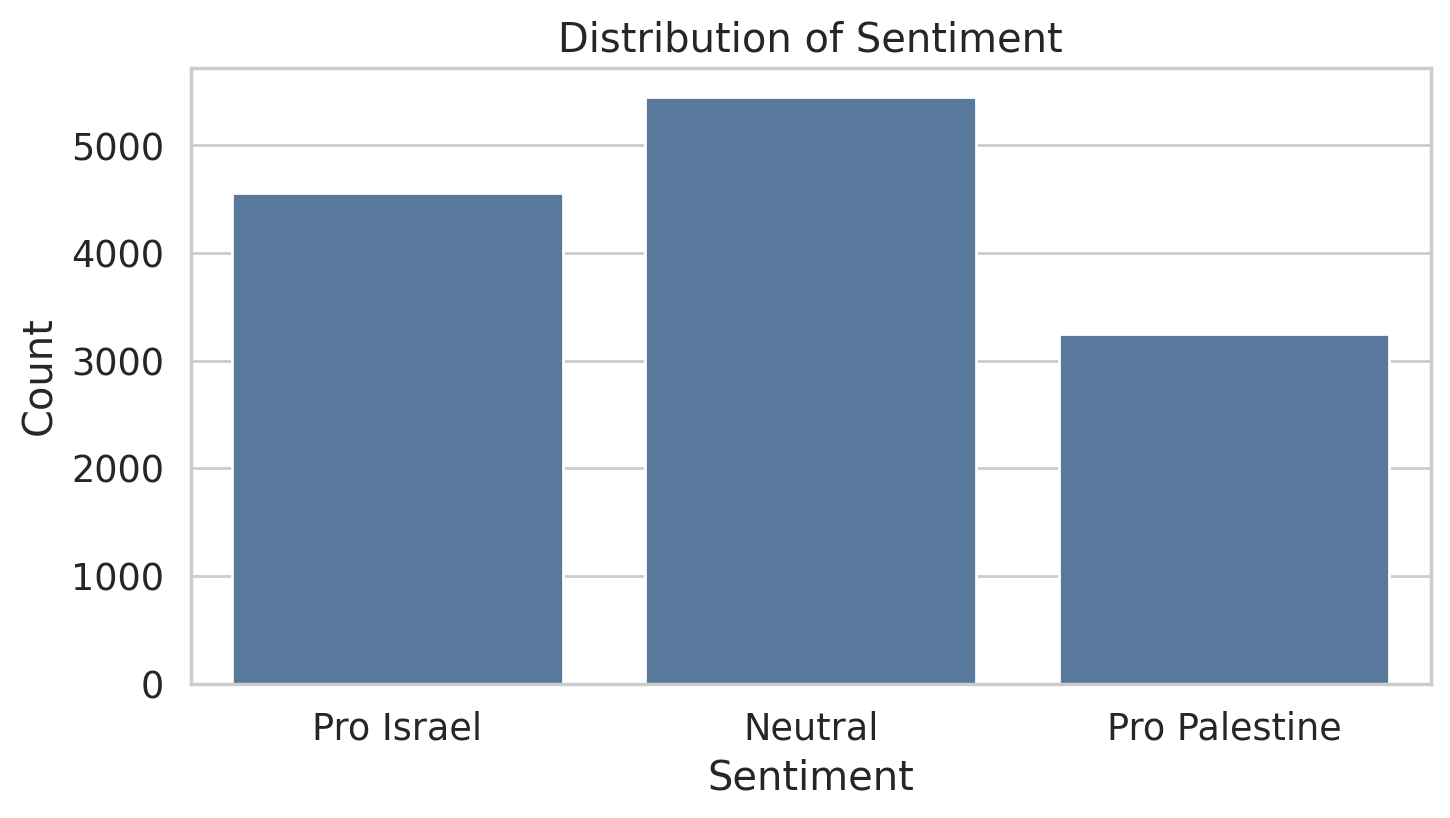

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='sentiment', data=merged_df)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Analyzing the sentiment across all sampled datasets, it is evident that the majority of comments express a neutral opinion. This observation suggests that comments under YouTube videos serve as a platform where individuals tend to express their thoughts in a manner that may encourage dialogue rather than merely passing judgment or condemning what they see. Naturally, the resultant sentiment is influenced by the sample of videos we have selected. Additionally, it is noteworthy that the number of comments supporting Israel exceeds those in favor of Palestine. In subsequent analyses, we will delve deeper into this phenomenon to understand these data thoroughly.

The prevalence of neutral comments might stem from various factors. Firstly, viewers who comment might prefer to discuss the content of the videos in a balanced or analytical way, avoiding polarizing opinions to foster a more constructive conversation. Secondly, neutral comments could be indicative of viewers trying to understand both sides of the conflict without showing explicit bias. Lastly, the nature of the video content and the way it presents information could also play a significant role in shaping viewers' responses, possibly steering them towards more measured and less partisan expressions. This neutrality might reflect a broader desire among YouTube users to engage in discussions that are informed and thoughtful rather than confrontational.

### Sentiment Analysis with respect of the News Channel

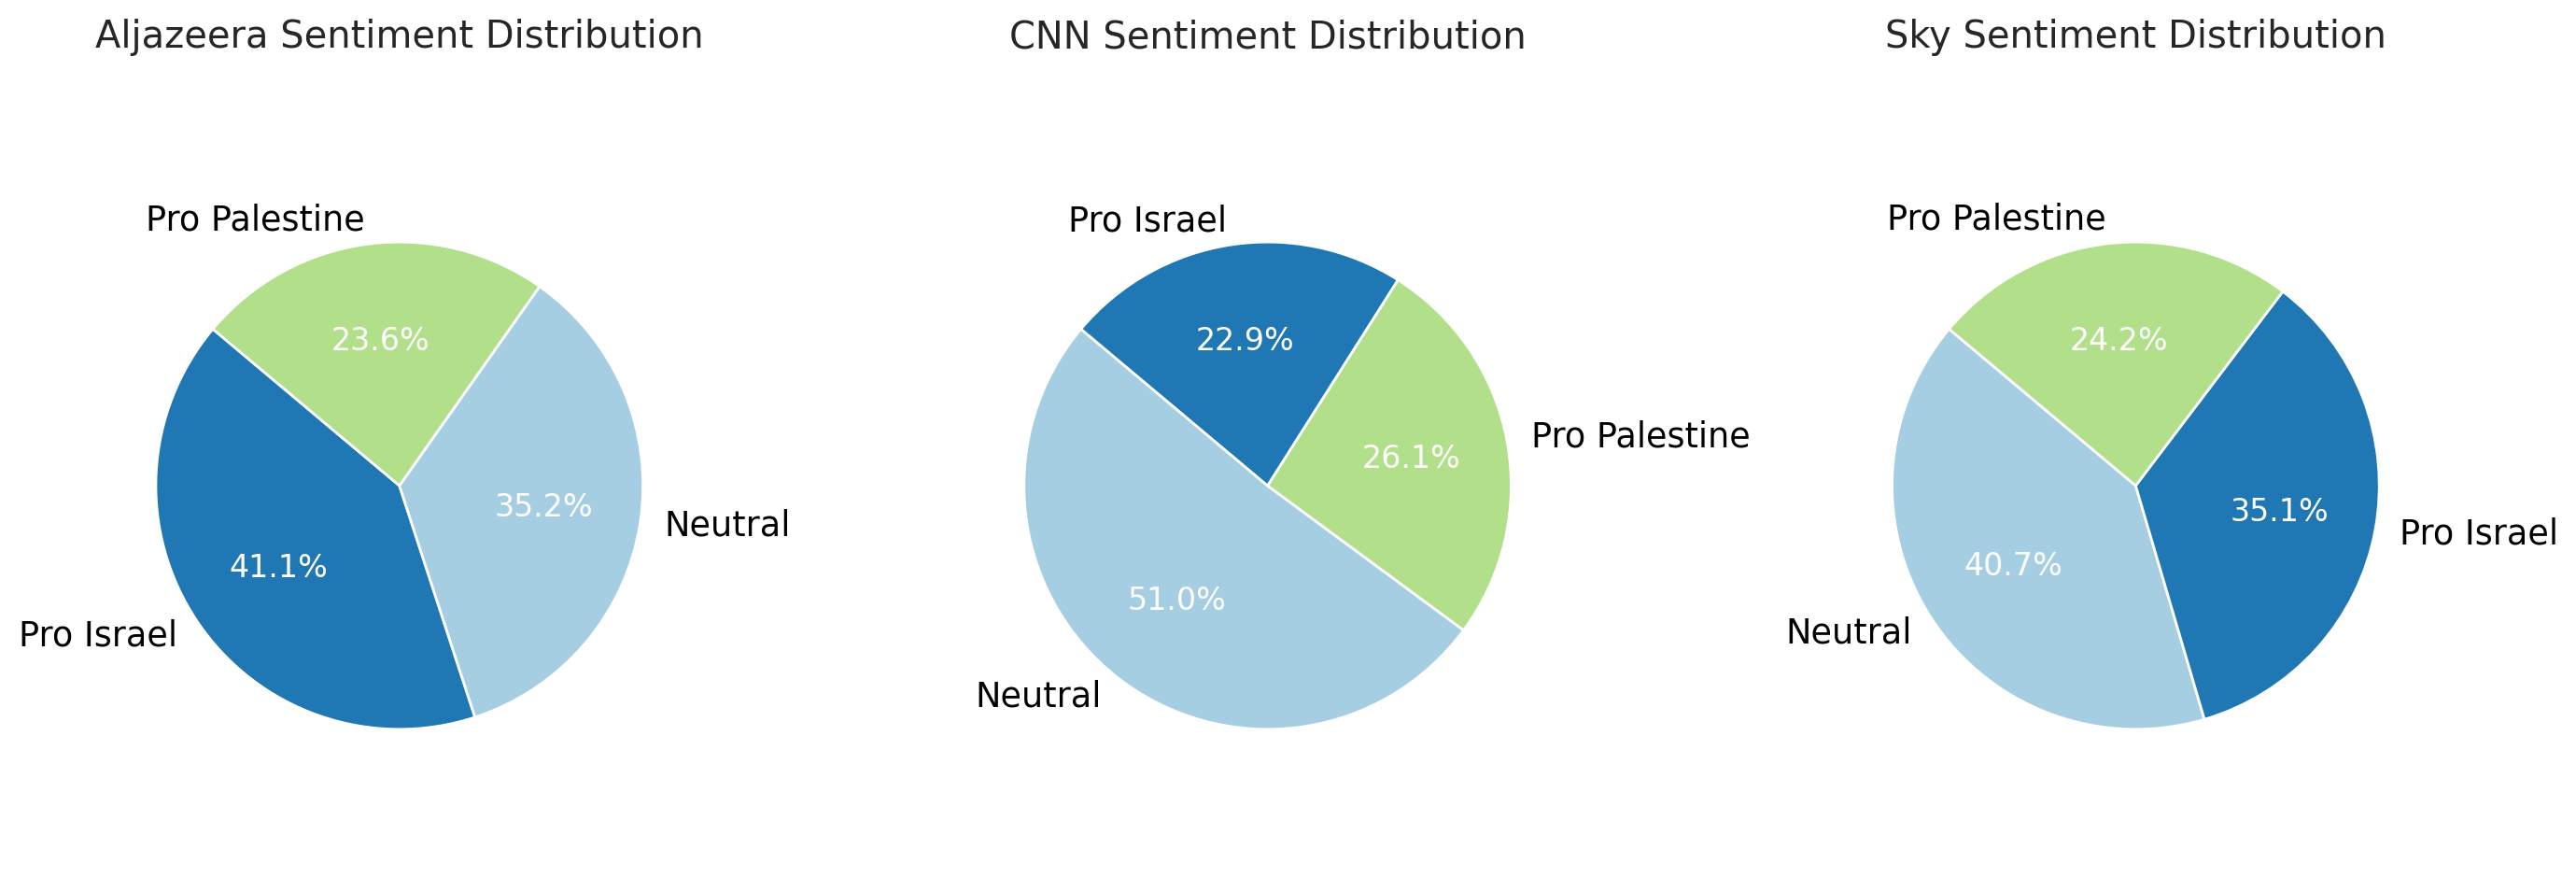

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define datasets for each year for each channel
aljazeera = pd.concat([aljazera_2023, aljazera_2024])
cnn = pd.concat([cnn_2023, cnn_2024])
sky = pd.concat([sky_2023, sky_2024])

# Create a dictionary of the combined datasets
channels = {
    'Aljazeera': aljazeera,
    'CNN': cnn,
    'Sky': sky
}

# Create a unique list of sentiments across all datasets
all_sentiments = pd.concat([df['sentiment'] for df in channels.values()]).unique()
all_sentiments.sort()  # Sort to maintain order
colors = plt.cm.Paired(range(len(all_sentiments)))  # Generate colors

# Map each sentiment to a specific color
color_map = {sentiment: color for sentiment, color in zip(all_sentiments, colors)}

# Set up the figure and axes for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(14, 5))  # Adjust layout to fit all three pies

for ax, (channel, data) in zip(axes, channels.items()):
    # Count the frequency of each sentiment
    sentiment_counts = data['sentiment'].value_counts(normalize=True)

    # Order colors according to the sorted list of all sentiments
    colors = [color_map[sentiment] for sentiment in sentiment_counts.index]

    # Plot pie chart
    wedges, texts, autotexts = ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

    # Set the title with some padding above the pie for clarity
    ax.set_title(f"{channel} Sentiment Distribution", pad=20)

    # Ensure pie charts are drawn as circles
    ax.axis('equal')

    # Adjust text color for better readability
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_size('small')

plt.tight_layout()
plt.show()


Analyzing the sentiment distribution across news channels, it's clear that neutral comments generally dominate. However, Al Jazeera shows a significantly higher percentage of pro-Israel comments (41.1%) compared to CNN (22.9%) and Sky News (35.1%). Also, Al Jazeera has fewer neutral comments than the other two channels, suggesting that it might be the channel with the most polarizing content. This pattern implies that the content on Al Jazeera may strongly influence viewers to express more definitive opinions. Particularly, the high number of pro-Israel comments could suggest that the channel's content resonates deeply with this group, leading them to express more pronounced opinions. This finding suggests further investigation is needed to understand how different media outlets influence viewer reactions.

###Sentiment Evolution over time

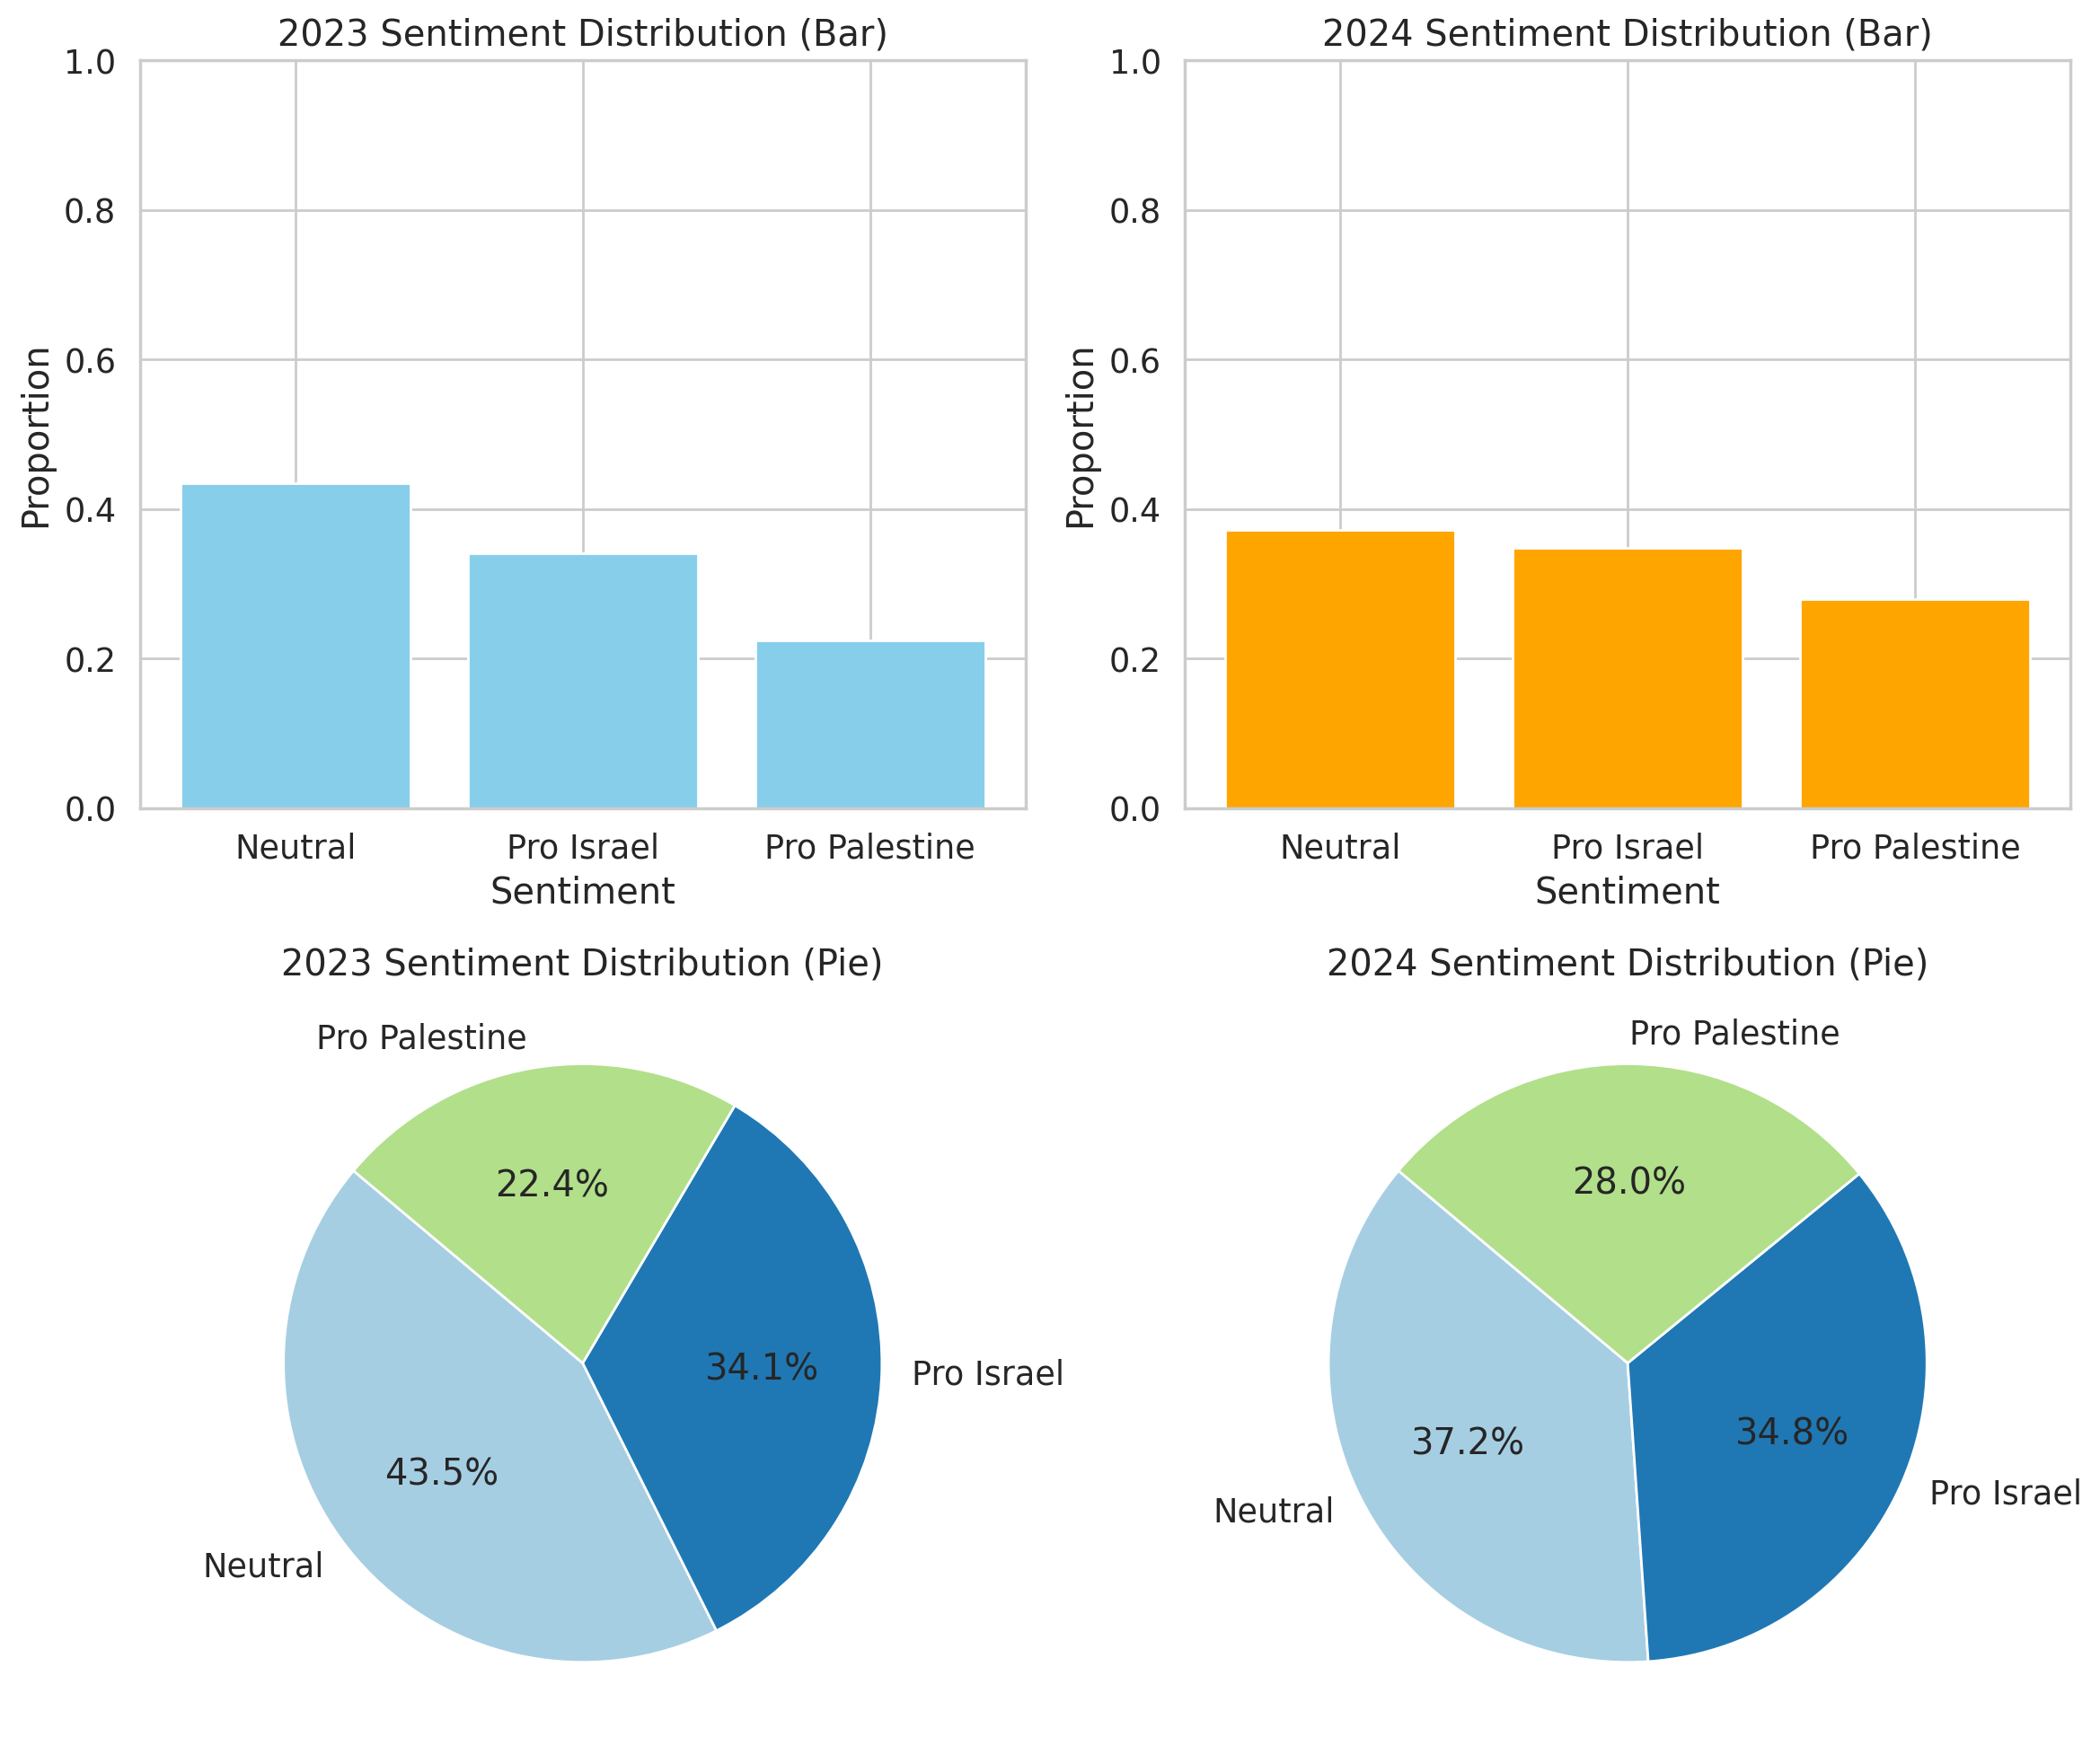

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded your datasets
datasets = {
    'Aljazeera 2023': aljazera_2023,
    'Aljazeera 2024': aljazera_2024,
    'CNN 2023': cnn_2023,
    'CNN 2024': cnn_2024,
    'Sky 2023': sky_2023,
    'Sky 2024': sky_2024
}

# Aggregate 2023 and 2024 data
data_2023 = pd.concat([df for name, df in datasets.items() if '2023' in name])
data_2024 = pd.concat([df for name, df in datasets.items() if '2024' in name])

# Calculate sentiment proportions
sentiment_2023 = data_2023['sentiment'].value_counts(normalize=True).sort_index()
sentiment_2024 = data_2024['sentiment'].value_counts(normalize=True).sort_index()

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Bar charts
axes[0, 0].bar(sentiment_2023.index, sentiment_2023.values, color='skyblue')
axes[0, 0].set_title('2023 Sentiment Distribution (Bar)')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylim(0, 1)

axes[0, 1].bar(sentiment_2024.index, sentiment_2024.values, color='orange')
axes[0, 1].set_title('2024 Sentiment Distribution (Bar)')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylim(0, 1)

# Pie charts
axes[1, 0].pie(sentiment_2023, labels=sentiment_2023.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_2023))))
axes[1, 0].set_title('2023 Sentiment Distribution (Pie)')

axes[1, 1].pie(sentiment_2024, labels=sentiment_2024.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_2024))))
axes[1, 1].set_title('2024 Sentiment Distribution (Pie)')

plt.tight_layout()
plt.show()

scrivi riflessione a riguardo

## evoluzione over time nello specifico per canale

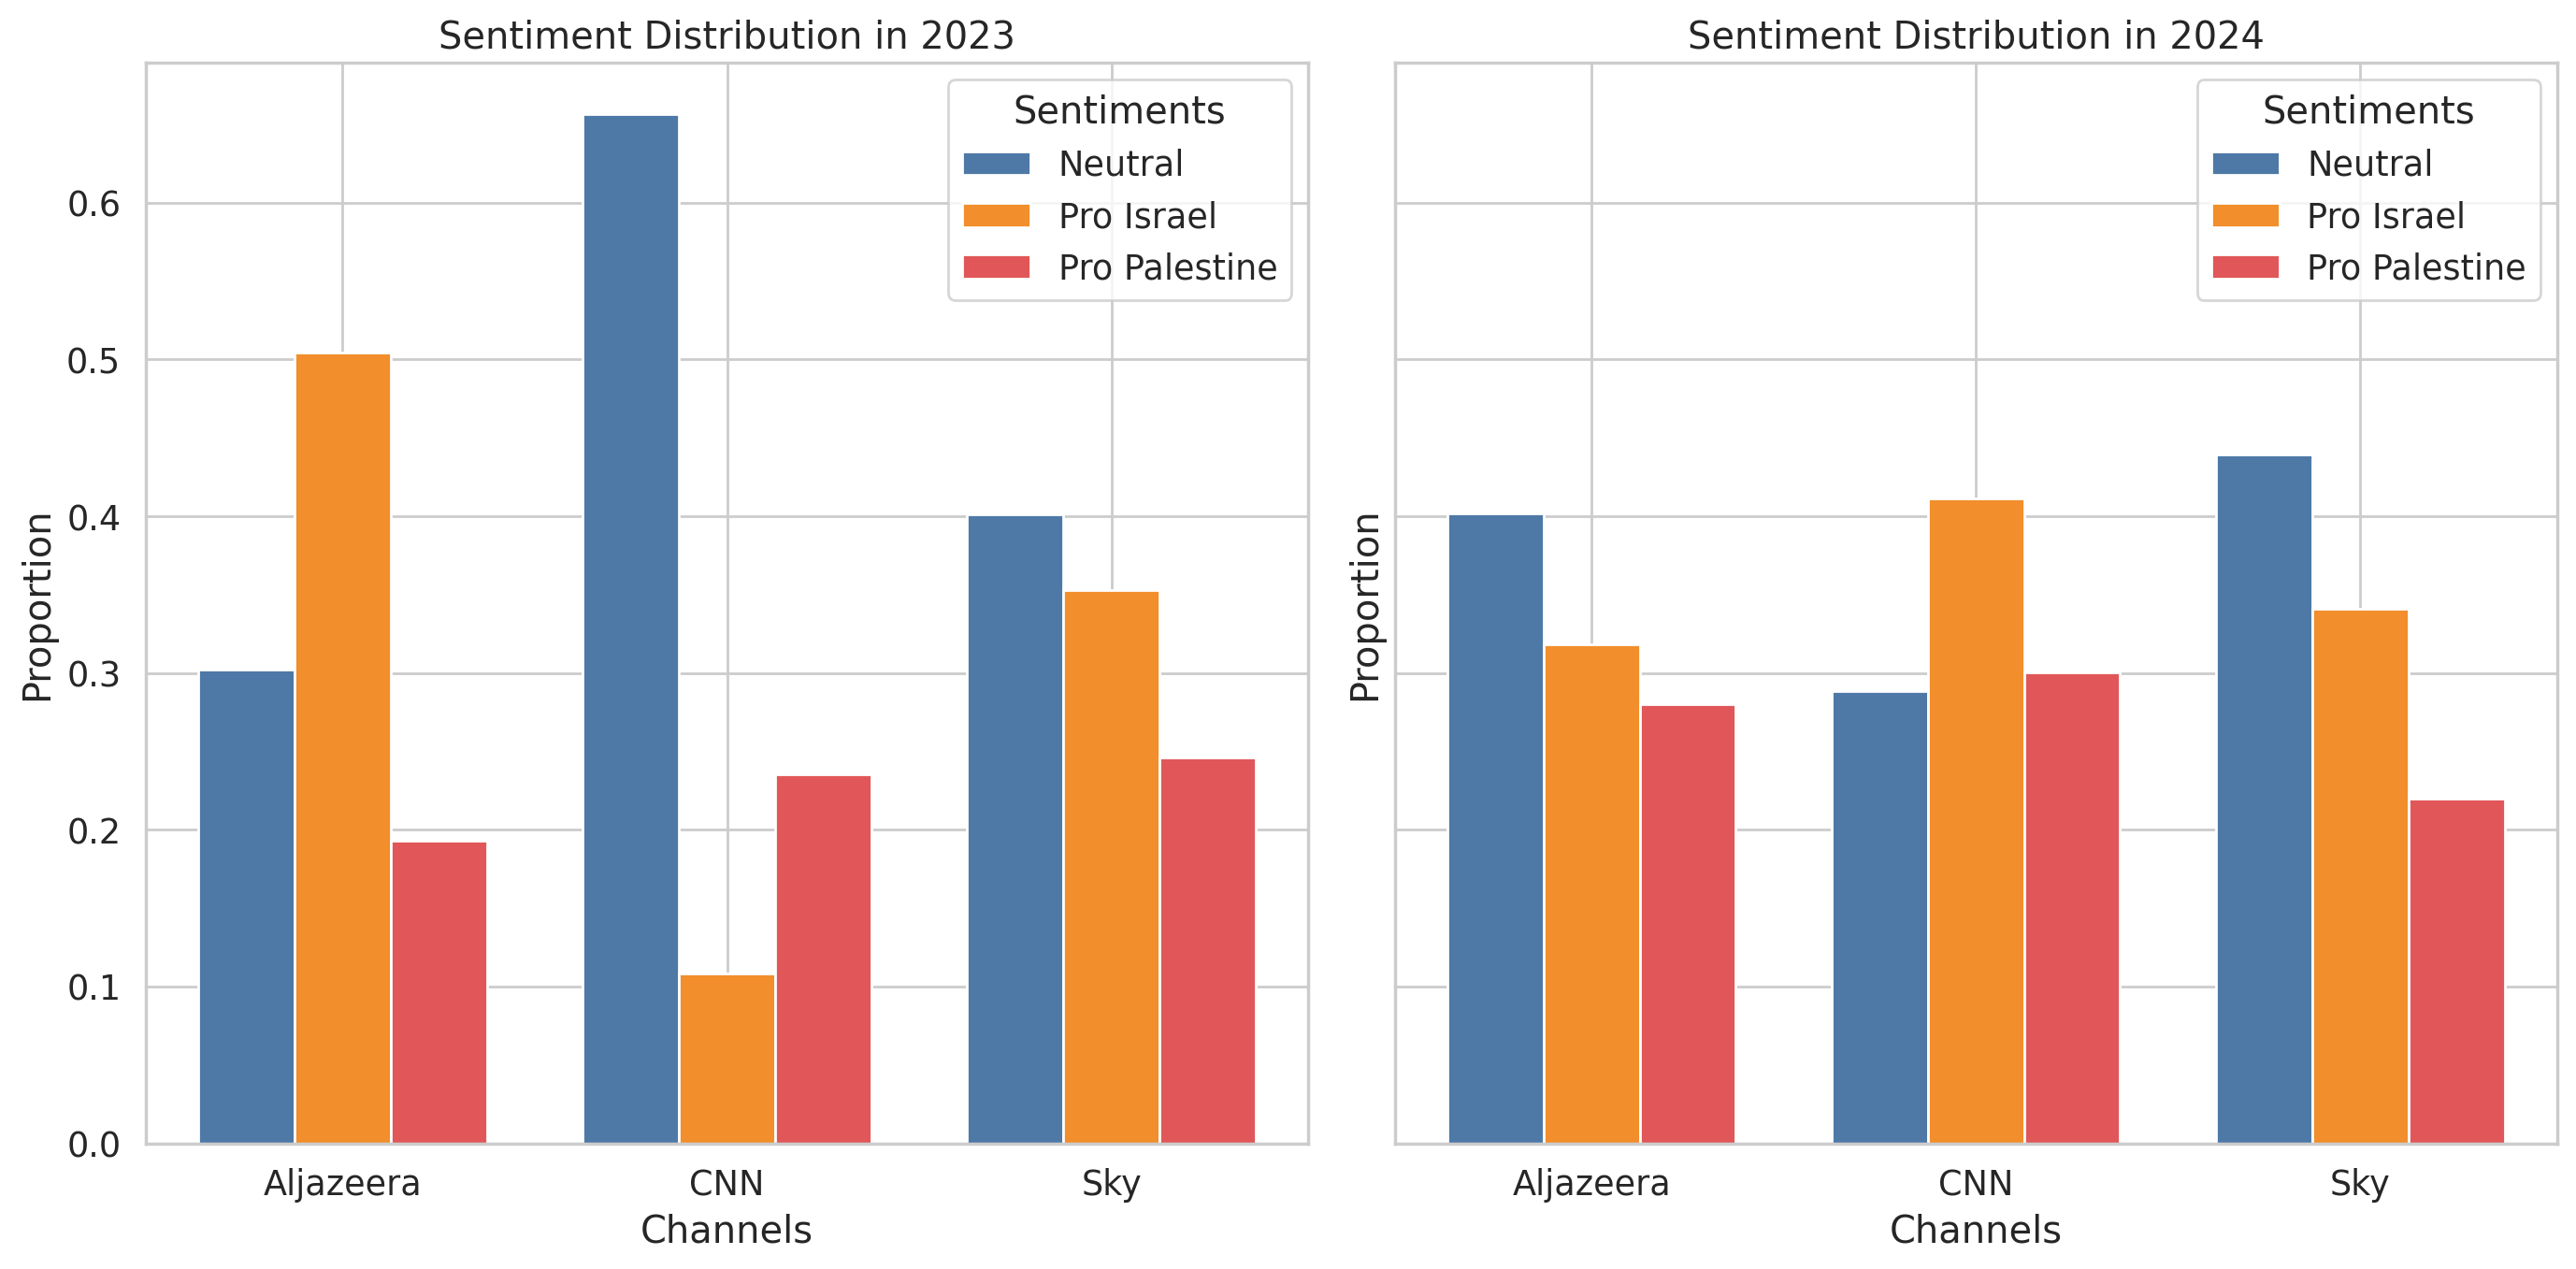

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already loaded your datasets as previously defined
datasets = {
    'Aljazeera 2023': aljazera_2023,
    'Aljazeera 2024': aljazera_2024,
    'CNN 2023': cnn_2023,
    'CNN 2024': cnn_2024,
    'Sky 2023': sky_2023,
    'Sky 2024': sky_2024
}

# Setting up a dictionary to hold data
sentiment_data = {year: {} for year in ['2023', '2024']}
channels = ['Aljazeera', 'CNN', 'Sky']

# Populate the dictionary with sentiment counts
for key, df in datasets.items():
    channel, year = key.split()
    sentiment_counts = df['sentiment'].value_counts(normalize=True)
    sentiment_data[year][channel] = sentiment_counts

# Set up the plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)

for i, year in enumerate(['2023', '2024']):
    ax = axes[i]
    # Create an array for the positions of the bars
    x = np.arange(len(channels))  # the label locations
    width = 0.25  # the width of the bars

    # We assume sentiments are consistent across all datasets; adjust as necessary
    sentiments = sorted(list(set.union(*(set(data.keys()) for data in sentiment_data[year].values()))))

    for j, sentiment in enumerate(sentiments):
        heights = [sentiment_data[year][channel].get(sentiment, 0) for channel in channels]
        ax.bar(x + j*width, heights, width, label=sentiment)

    ax.set_xlabel('Channels')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Sentiment Distribution in {year}')
    ax.set_xticks(x + width)
    ax.set_xticklabels(channels)
    ax.legend(title='Sentiments')

plt.tight_layout()
plt.show()


commento

fai grafico per ogni canale pie chart 2023 e 2024 con bar chart e commenta le differenze che vedi

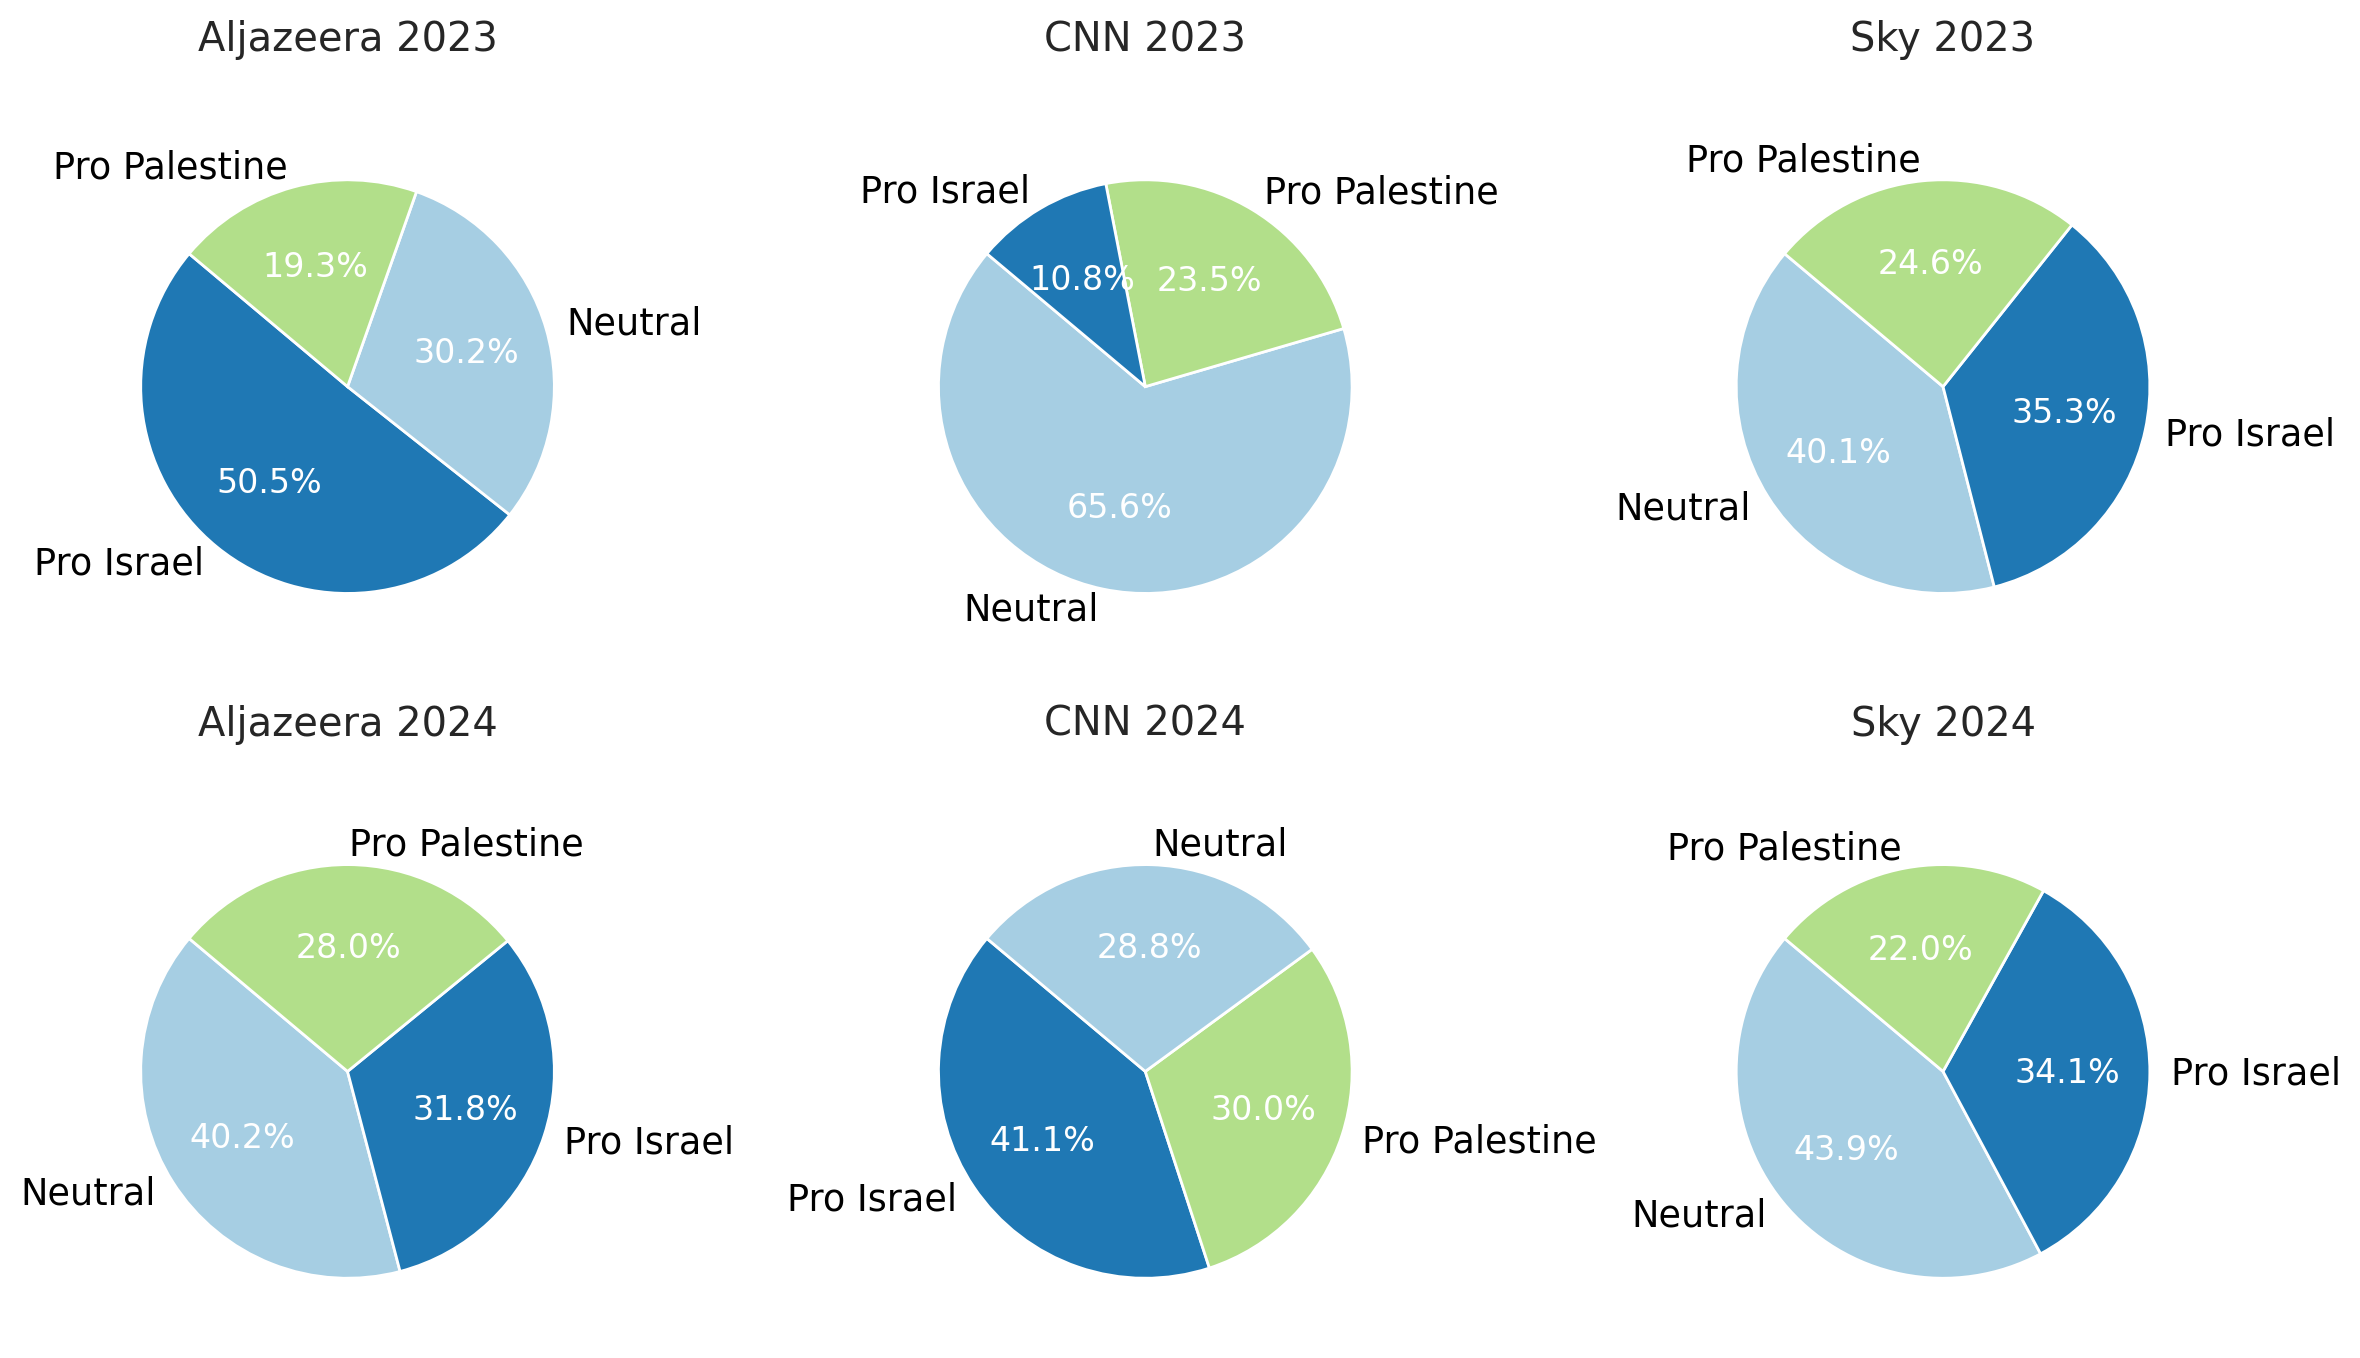

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

datasets = {
    'Aljazeera 2023': aljazera_2023,
    'CNN 2023': cnn_2023,
    'Sky 2023': sky_2023,
    'Aljazeera 2024': aljazera_2024,
    'CNN 2024': cnn_2024,
    'Sky 2024': sky_2024
}

# Create a unique list of sentiments across all datasets
all_sentiments = pd.concat([df['sentiment'] for df in datasets.values()]).unique()
all_sentiments.sort()  # Sort to maintain order
colors = plt.cm.Paired(range(len(all_sentiments)))  # Generate colors

# Map each sentiment to a specific color
color_map = {sentiment: color for sentiment, color in zip(all_sentiments, colors)}

# Set up the figure and axes for the pie charts
fig, axes = plt.subplots(2, 3, figsize=(12, 7))  # Adjust size as needed
axes = axes.flatten()

for ax, (title, data) in zip(axes, datasets.items()):
    # Count the frequency of each sentiment
    sentiment_counts = data['sentiment'].value_counts(normalize=True)

    # Order colors according to the sorted list of all sentiments
    colors = [color_map[sentiment] for sentiment in sentiment_counts.index]

    # Plot pie chart
    wedges, texts, autotexts = ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

    # Beautify the plot by adjusting title position
    ax.set_title(title, y=1.1)  # Adjust 'y' value as needed to lift the title higher
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Adjust text color for better readability
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_size('small')

plt.tight_layout()
plt.show()



# MI VIENE IN MENTE CHE AL POSTO DI MOSTRARE QUESTO GRAFICO NEL PAPER POSSO PIUTTOSTO REALIZZARE UNA TABELLA CON QUARTO DOVE MOSTRO
# I RISULTATI PERCENTUALI PIUTTOSTO DI QUESTO PLOT CHE POSSO IN OGNI CASO LASCIARE IN QUESTO FILE COME ANALISI

## analisi lunghezza commenti rispetto al sentiment

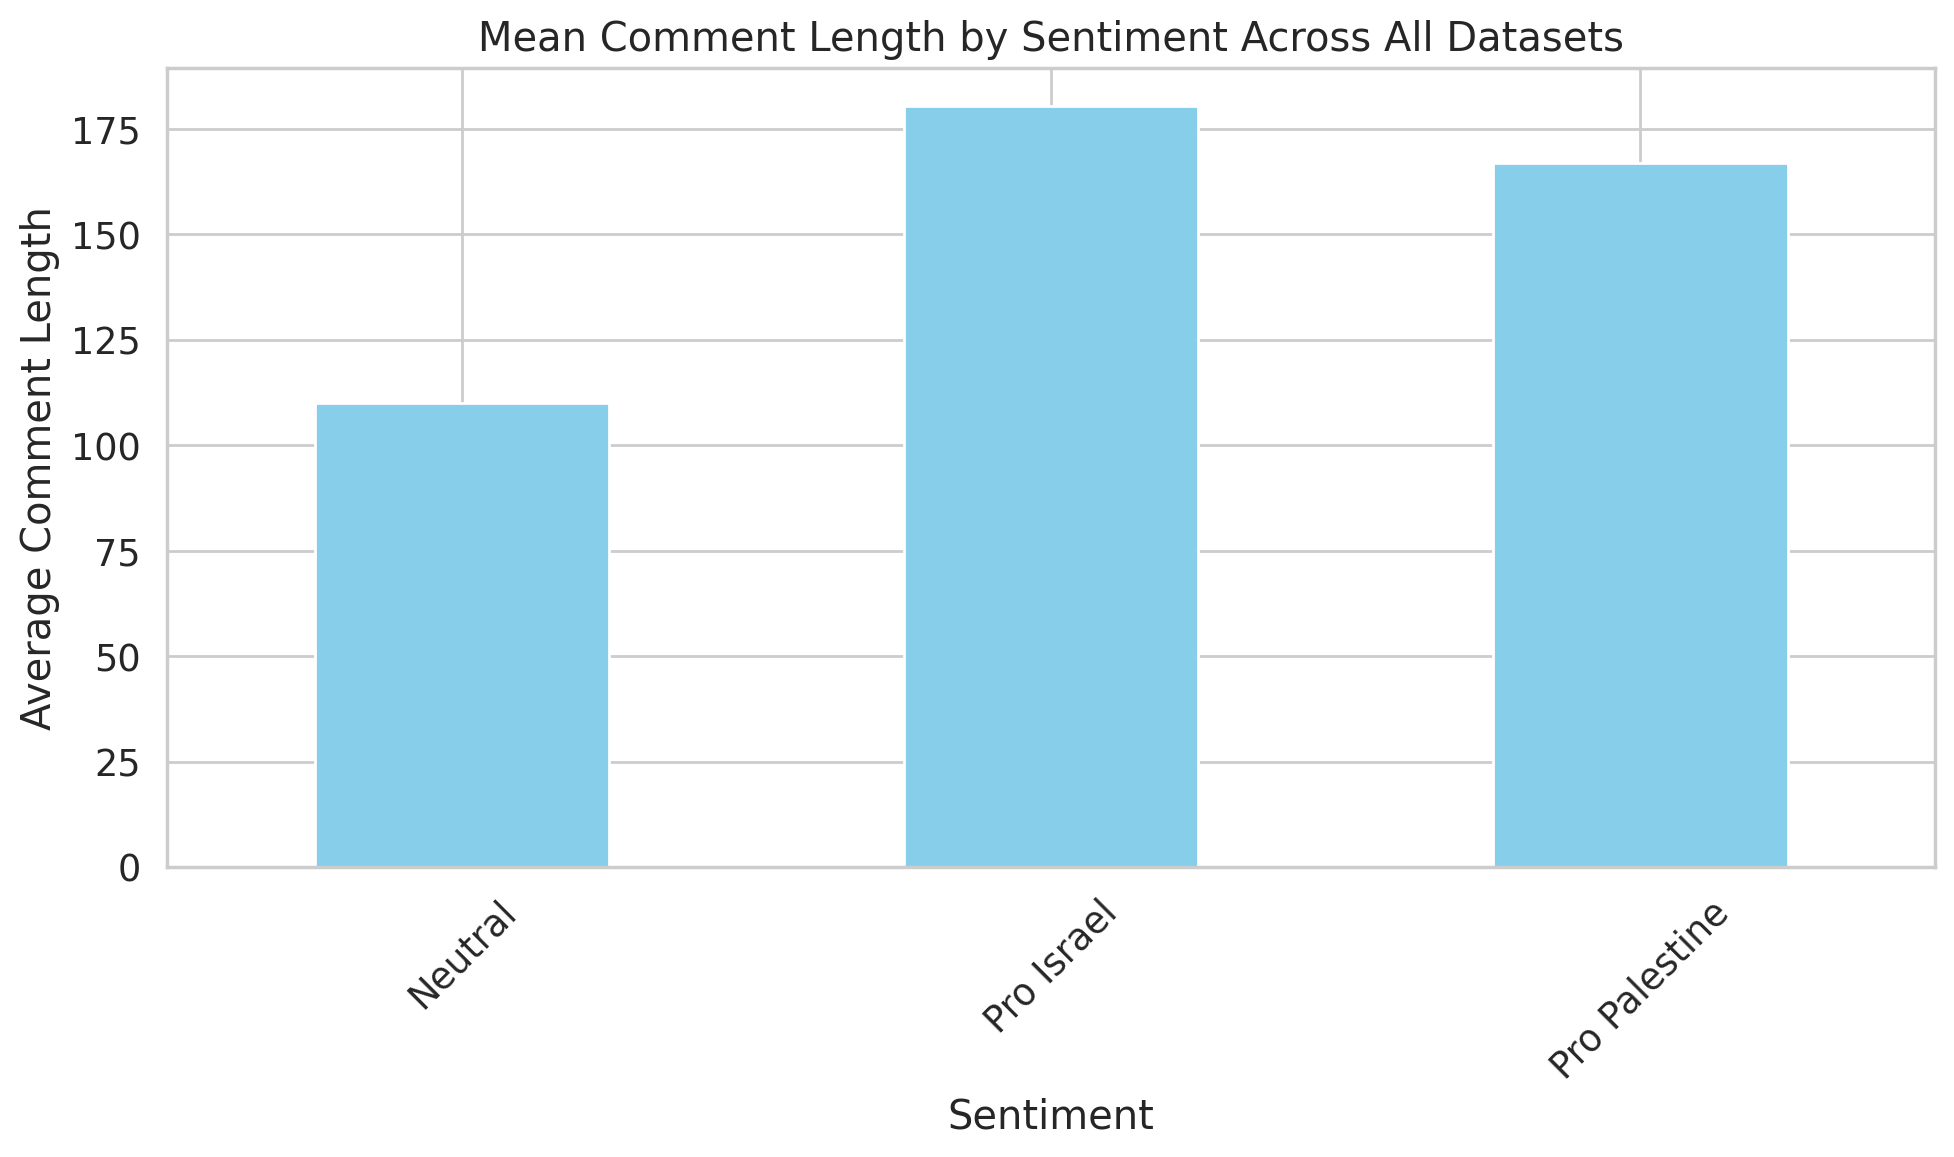

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Concateniamo tutti i dataset in un unico DataFrame
all_data = pd.concat(datasets.values(), keys=datasets.keys())

# Assicuriamoci che la colonna 'text' sia una stringa
all_data['text'] = all_data['text'].astype(str)

# Calcolo la lunghezza dei commenti
all_data['comment_length'] = all_data['text'].apply(len)

# Calcolo la media della lunghezza dei commenti per ogni sentiment, aggregando tutti i dati
mean_lengths = all_data.groupby('sentiment')['comment_length'].mean()

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
mean_lengths.plot(kind='bar', color='skyblue')
plt.title('Mean Comment Length by Sentiment Across All Datasets')
plt.ylabel('Average Comment Length')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



From the aggregated data analysis of comments across various datasets for 2023 and 2024, it is evident that comments expressing pro-Israel sentiments tend to be longer than those that are pro-Palestine or neutral. This trend may reflect the complexity of the issues being discussed or a need to respond to international criticisms, necessitating detailed explanations or in-depth context. The increased length could also suggest a particular communication style preferred by pro-Israel supporters, favoring an expository and detailed approach.

Editorial influences from different media channels such as Al Jazeera, CNN, and Sky could also significantly shape how sentiments are expressed, as each outlet may attract and foster specific types of discourse depending on its audience and editorial line.

These findings underscore the importance of considering not just the content but also the mode of expression in online discussions, especially in complex geopolitical contexts like the Israeli-Palestinian conflict. Further qualitative research could clarify the motivations behind these differences.

potrei anche analizzare i commenti con o meglio il sentiment che ha piú like e trovare argomentazioni a riguardo

# TOPIC MODELLING

## BOZZA ANALISI SENTIMENT

preveling sentiment among all the networks

In [ ]:
merged_df = pd.concat([aljazera_2023, aljazera_2024, cnn_2023, cnn_2024, sky_2023, sky_2024], axis = 0)

In [ ]:
values = merged_df['sentiment'].value_counts()
values

,count
sentiment,
2,5452
0,4560
1,3248


DISTRIBUTION ACROSS ALL THE DATASETS

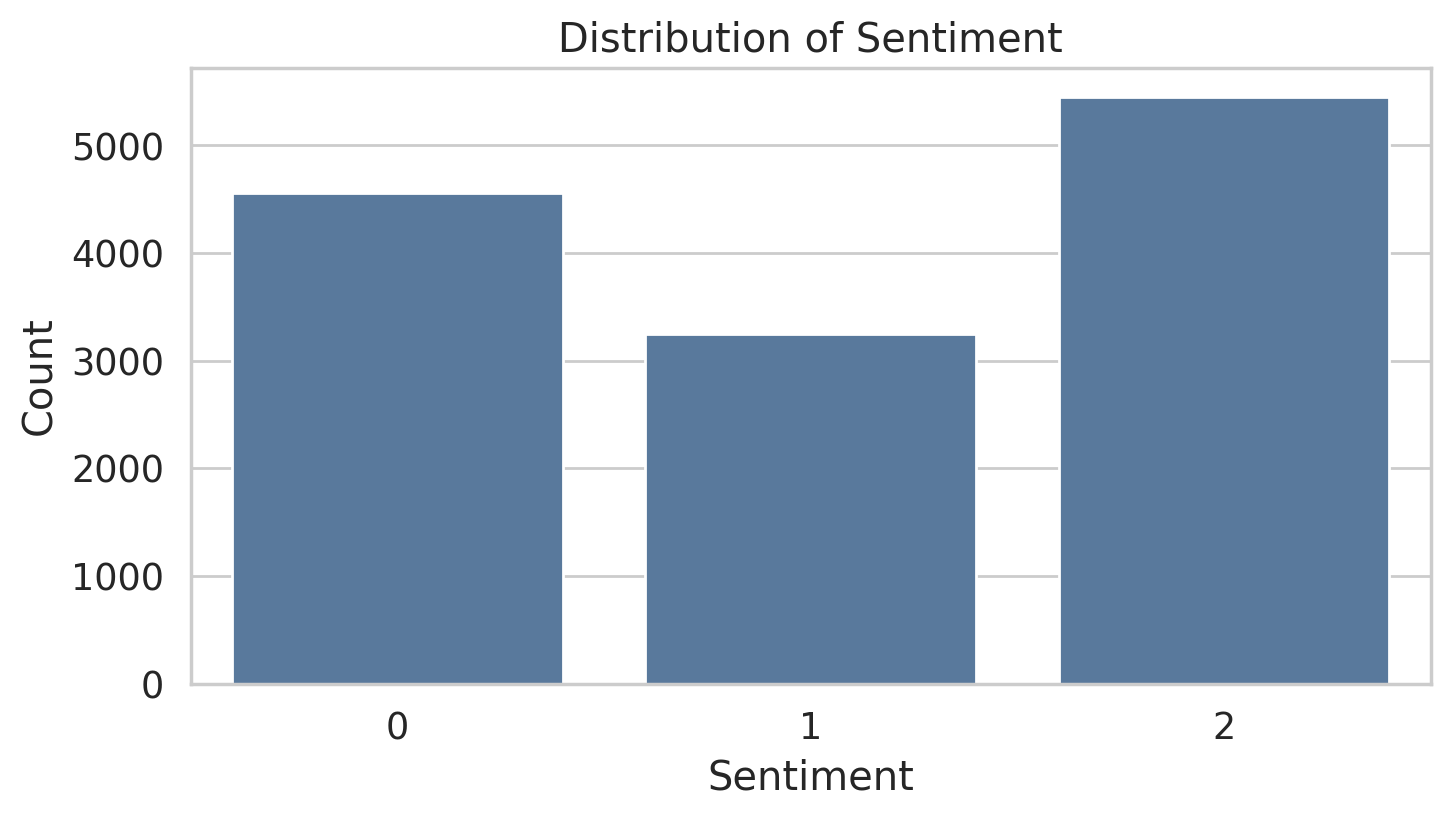

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='sentiment', data=merged_df)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

SENTIMENT IN EACH VIDEO

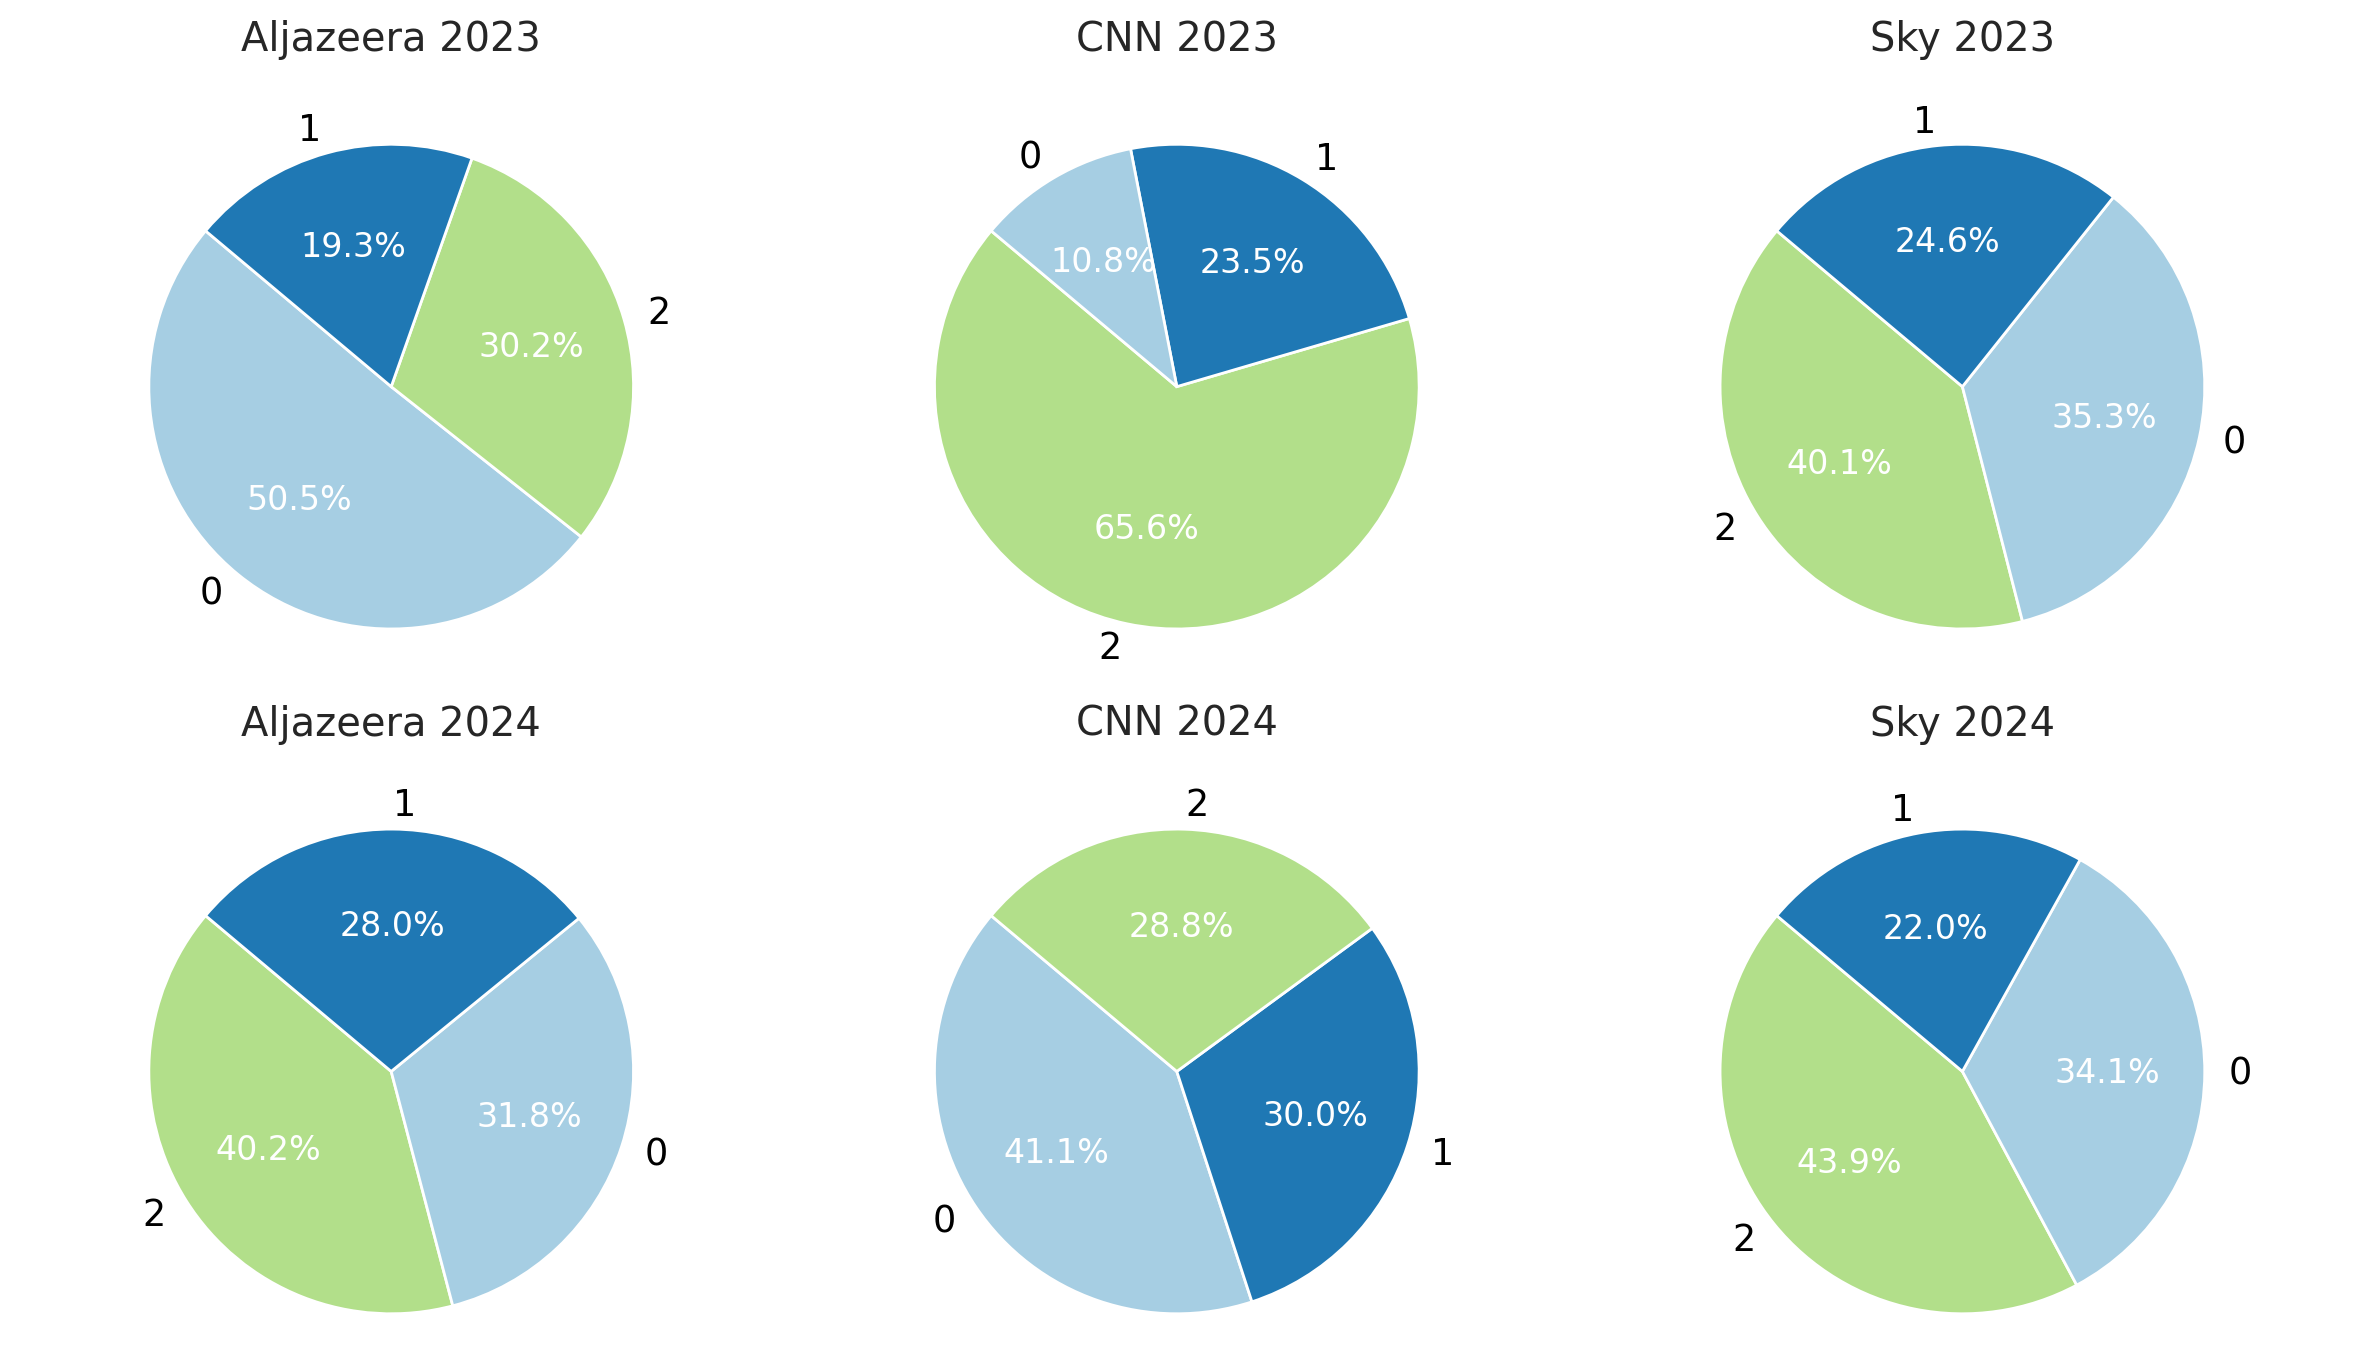

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

datasets = {
    'Aljazeera 2023': aljazera_2023,
    'CNN 2023': cnn_2023,
    'Sky 2023': sky_2023,
    'Aljazeera 2024': aljazera_2024,
    'CNN 2024': cnn_2024,
    'Sky 2024': sky_2024
}

# Create a unique list of sentiments across all datasets
all_sentiments = pd.concat([df['sentiment'] for df in datasets.values()]).unique()
all_sentiments.sort()  # Sort to maintain order
colors = plt.cm.Paired(range(len(all_sentiments)))  # Generate colors

# Map each sentiment to a specific color
color_map = {sentiment: color for sentiment, color in zip(all_sentiments, colors)}

# Set up the figure and axes for the pie charts
fig, axes = plt.subplots(2, 3, figsize=(12, 7))  # Adjust size as needed
axes = axes.flatten()

for ax, (title, data) in zip(axes, datasets.items()):
    # Count the frequency of each sentiment
    sentiment_counts = data['sentiment'].value_counts(normalize=True)

    # Order colors according to the sorted list of all sentiments
    colors = [color_map[sentiment] for sentiment in sentiment_counts.index]

    # Plot pie chart
    wedges, texts, autotexts = ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

    # Beautify the plot by adjusting title position
    ax.set_title(title, y=1.1)  # Adjust 'y' value as needed to lift the title higher
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Adjust text color for better readability
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_size('small')

plt.tight_layout()
plt.show()


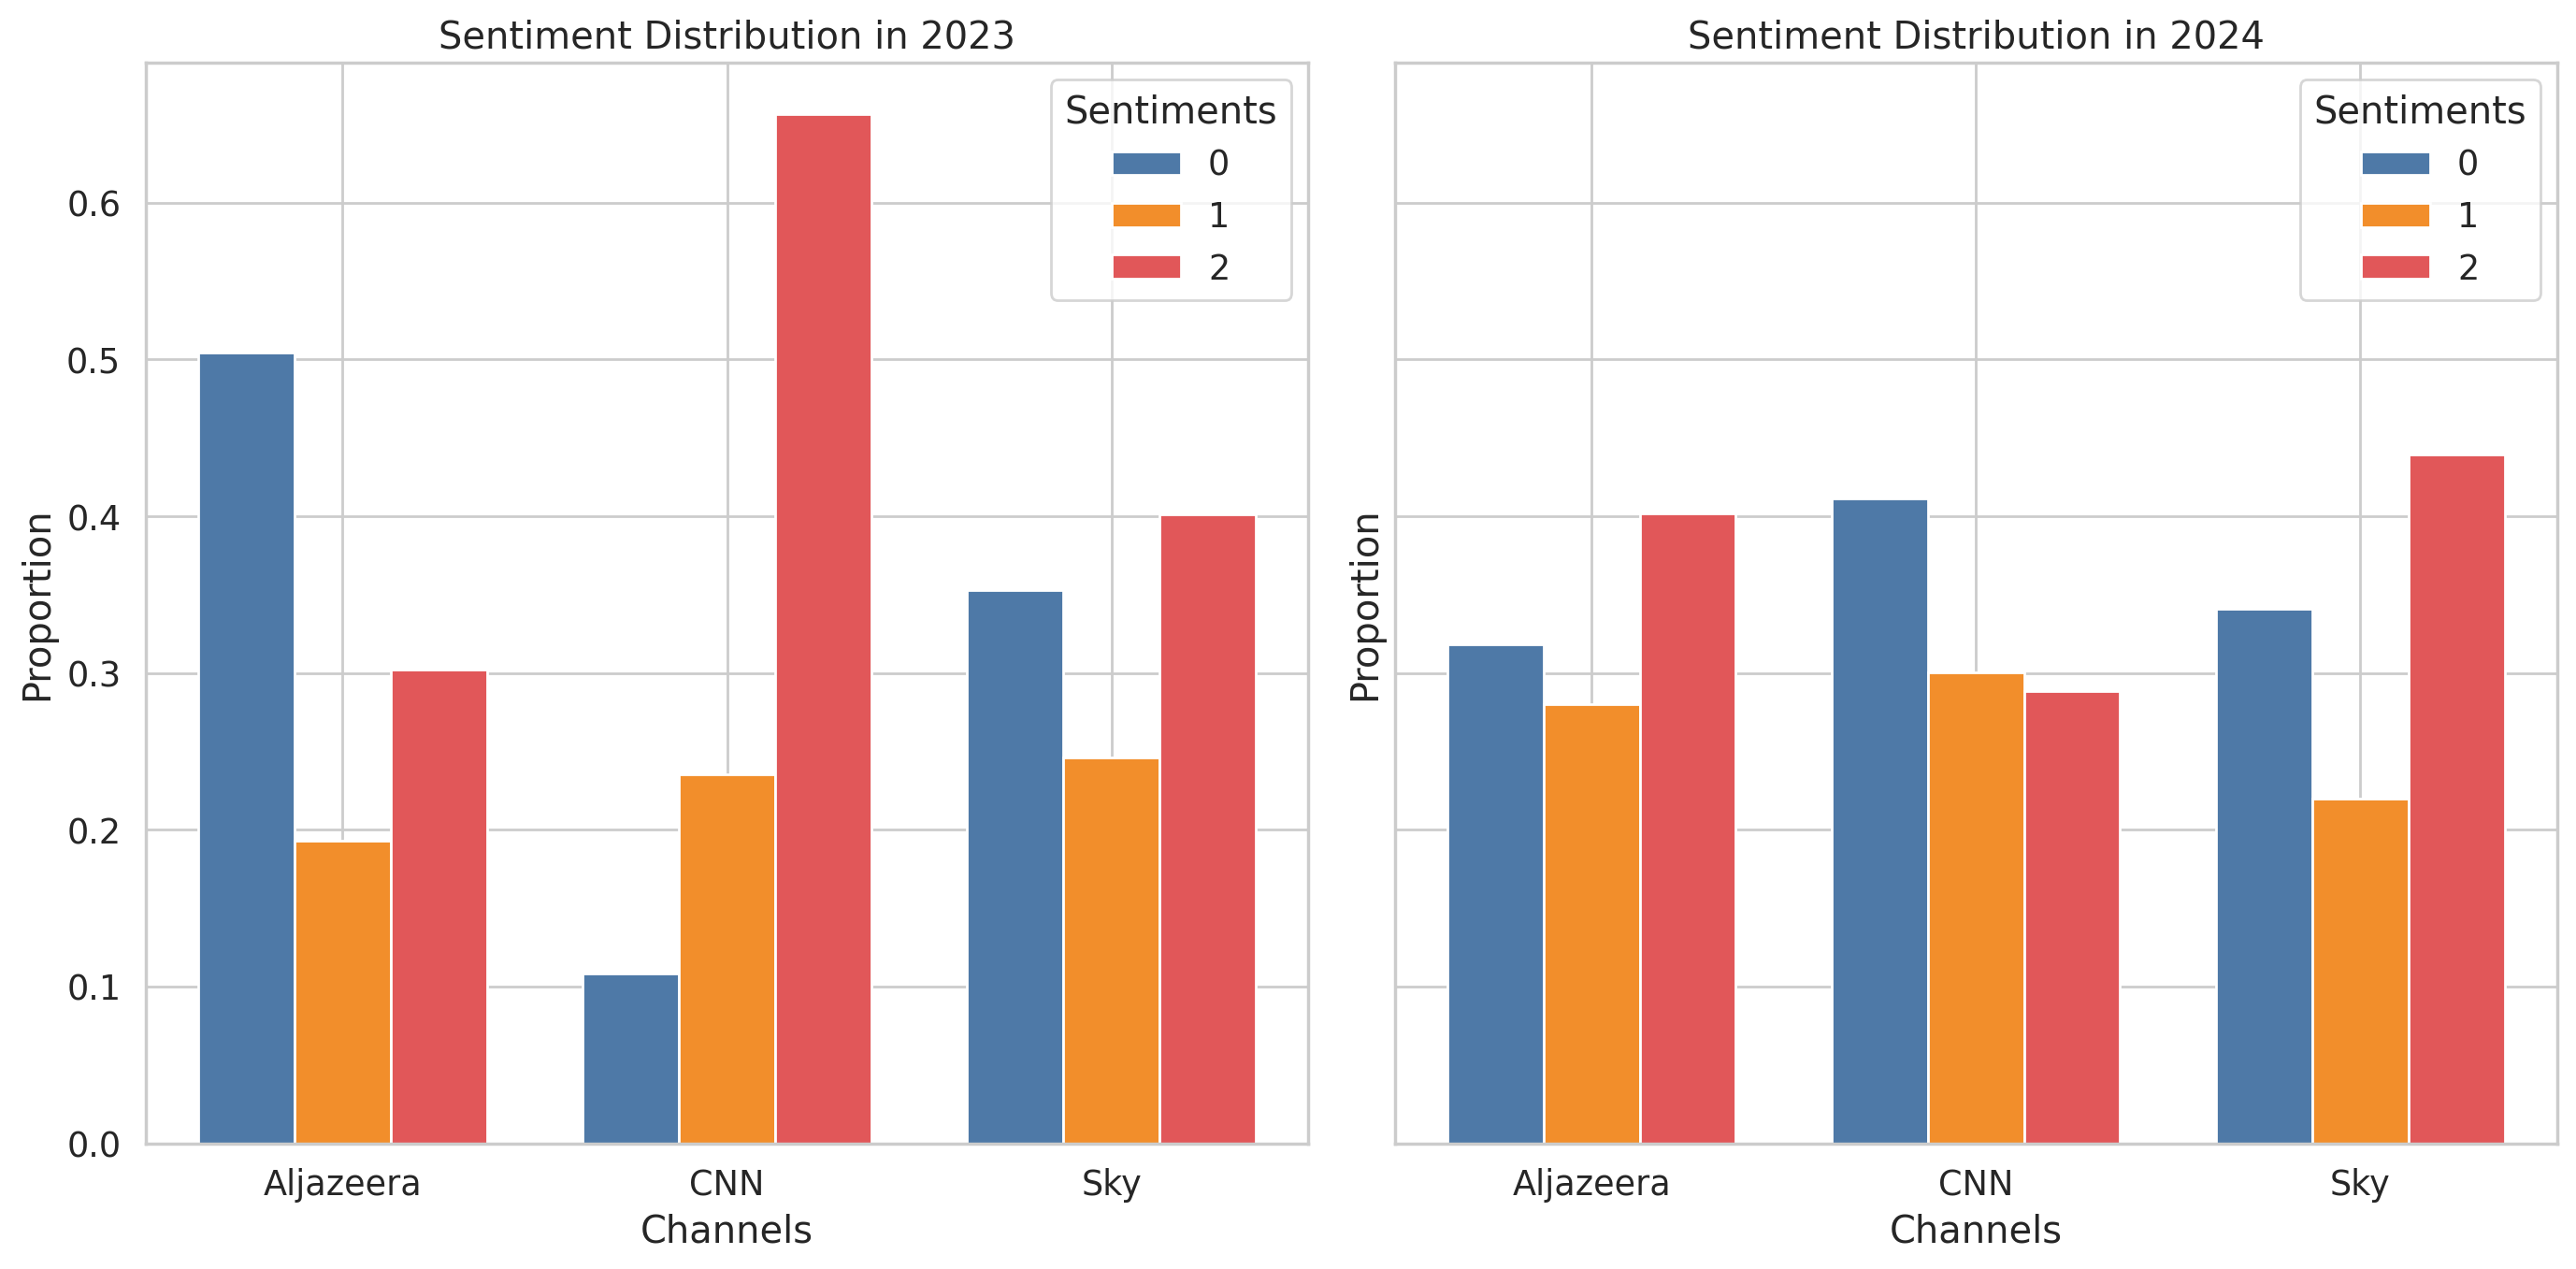

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already loaded your datasets as previously defined
datasets = {
    'Aljazeera 2023': aljazera_2023,
    'Aljazeera 2024': aljazera_2024,
    'CNN 2023': cnn_2023,
    'CNN 2024': cnn_2024,
    'Sky 2023': sky_2023,
    'Sky 2024': sky_2024
}

# Setting up a dictionary to hold data
sentiment_data = {year: {} for year in ['2023', '2024']}
channels = ['Aljazeera', 'CNN', 'Sky']

# Populate the dictionary with sentiment counts
for key, df in datasets.items():
    channel, year = key.split()
    sentiment_counts = df['sentiment'].value_counts(normalize=True)
    sentiment_data[year][channel] = sentiment_counts

# Set up the plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)

for i, year in enumerate(['2023', '2024']):
    ax = axes[i]
    # Create an array for the positions of the bars
    x = np.arange(len(channels))  # the label locations
    width = 0.25  # the width of the bars

    # We assume sentiments are consistent across all datasets; adjust as necessary
    sentiments = sorted(list(set.union(*(set(data.keys()) for data in sentiment_data[year].values()))))

    for j, sentiment in enumerate(sentiments):
        heights = [sentiment_data[year][channel].get(sentiment, 0) for channel in channels]
        ax.bar(x + j*width, heights, width, label=sentiment)

    ax.set_xlabel('Channels')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Sentiment Distribution in {year}')
    ax.set_xticks(x + width)
    ax.set_xticklabels(channels)
    ax.legend(title='Sentiments')

plt.tight_layout()
plt.show()


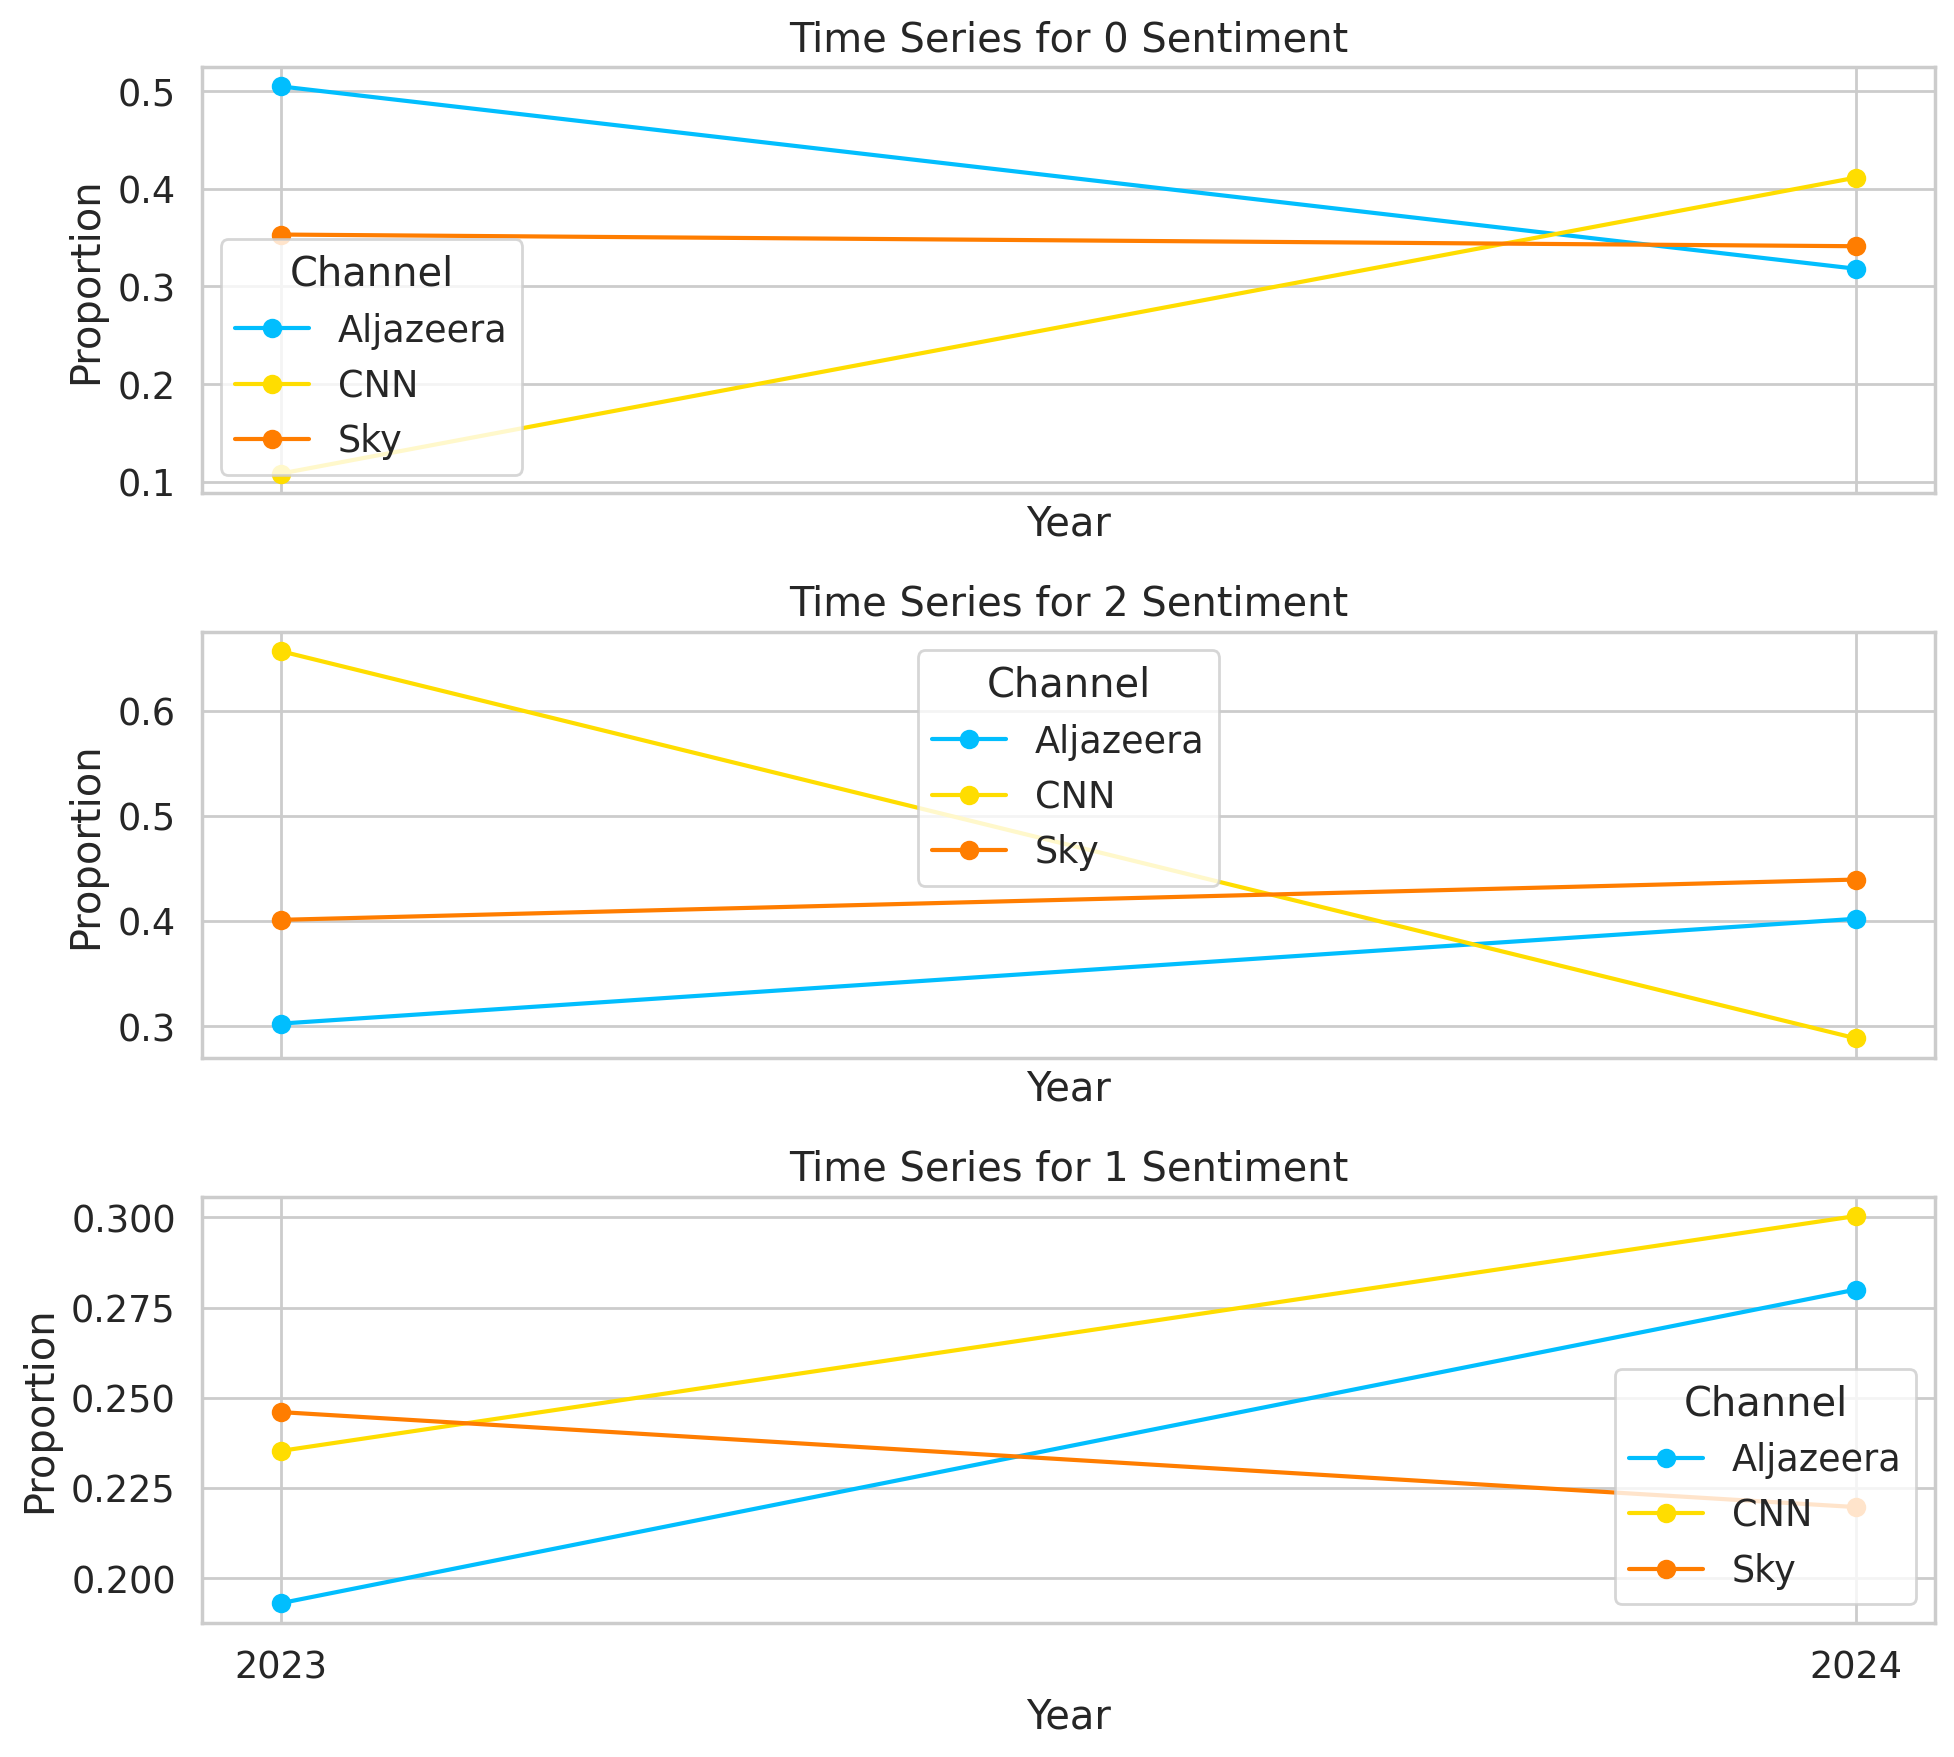

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already loaded your datasets as previously defined
datasets = {
    'Aljazeera 2023': aljazera_2023,
    'Aljazeera 2024': aljazera_2024,
    'CNN 2023': cnn_2023,
    'CNN 2024': cnn_2024,
    'Sky 2023': sky_2023,
    'Sky 2024': sky_2024
}

# Organize data by sentiment
sentiment_data = {}
channels = ['Aljazeera', 'CNN', 'Sky']
years = ['2023', '2024']

for channel in channels:
    for year in years:
        key = f'{channel} {year}'
        for sentiment, count in datasets[key]['sentiment'].value_counts(normalize=True).items():
            if sentiment not in sentiment_data:
                sentiment_data[sentiment] = {}
            if channel not in sentiment_data[sentiment]:
                sentiment_data[sentiment][channel] = {}
            sentiment_data[sentiment][channel][year] = count

# Plotting each sentiment in a separate subplot
fig, axes = plt.subplots(nrows=len(sentiment_data), figsize=(10, len(sentiment_data)*3), sharex=True)

if len(sentiment_data) == 1:  # If there is only one sentiment, matplotlib does not return an array of axes
    axes = [axes]

for ax, (sentiment, channel_data) in zip(axes, sentiment_data.items()):
    for channel in channels:
        years_data = [channel_data[channel].get(year, 0) for year in years]
        ax.plot(years, years_data, marker='o', label=f'{channel}')

    ax.set_title(f'Time Series for {sentiment} Sentiment')
    ax.set_xlabel('Year')
    ax.set_ylabel('Proportion')
    ax.legend(title='Channel')

plt.tight_layout()
plt.show()


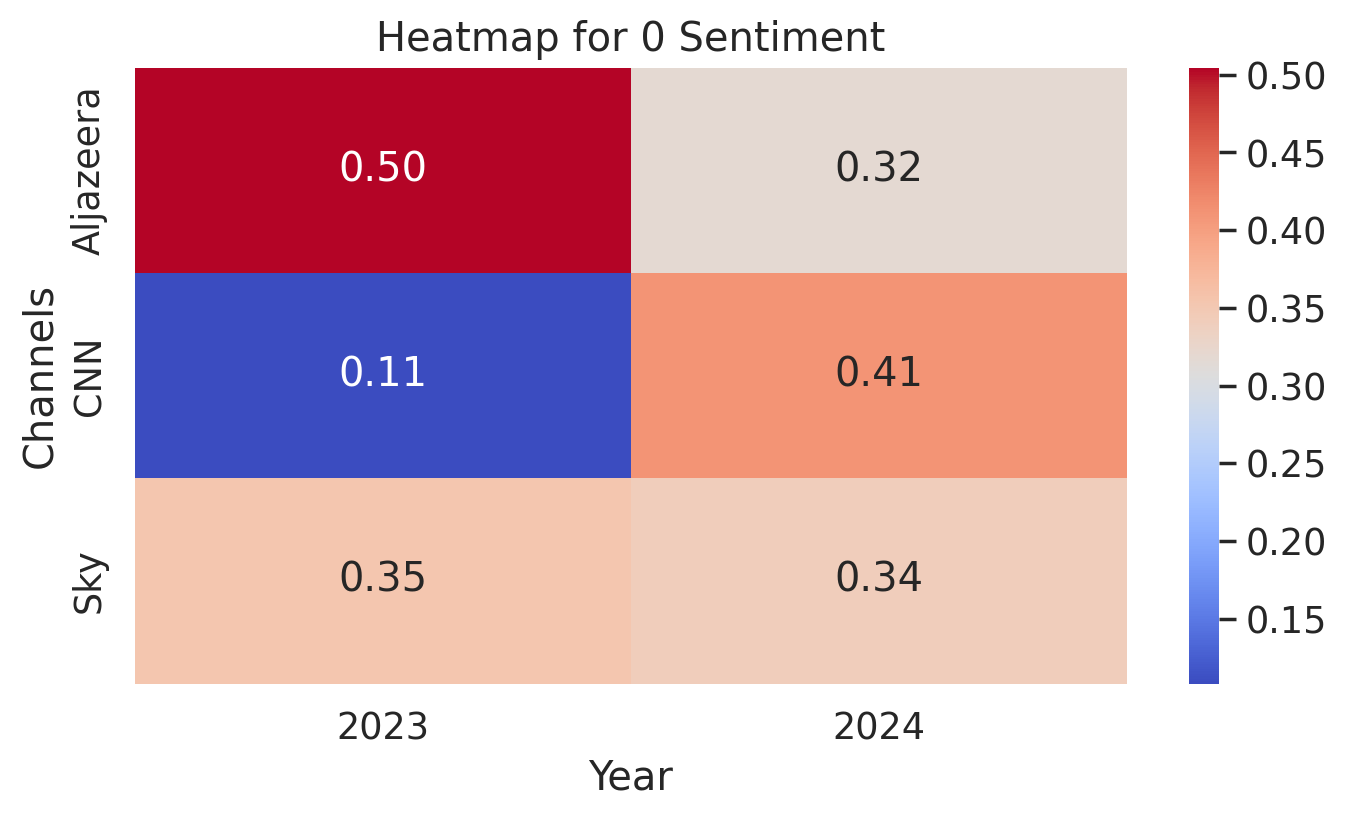

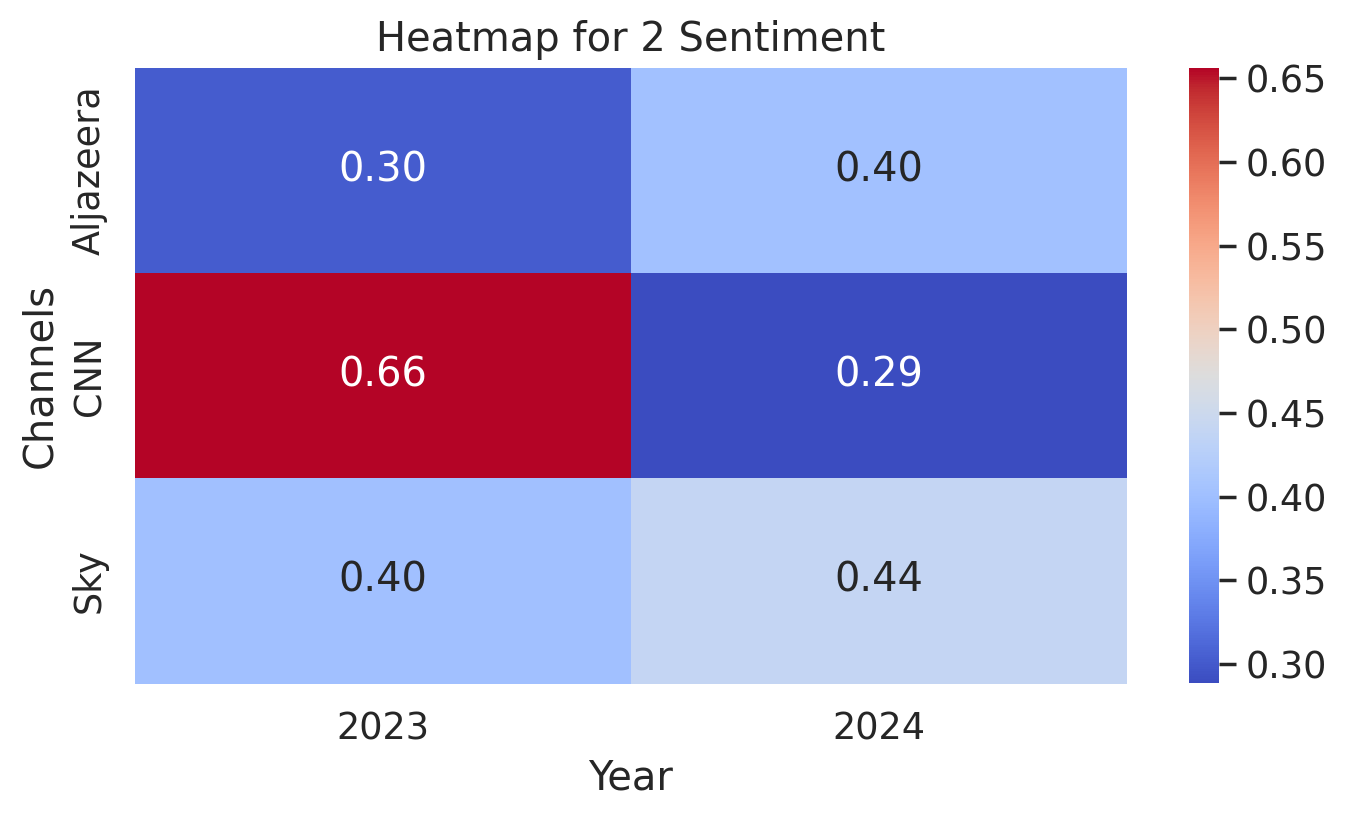

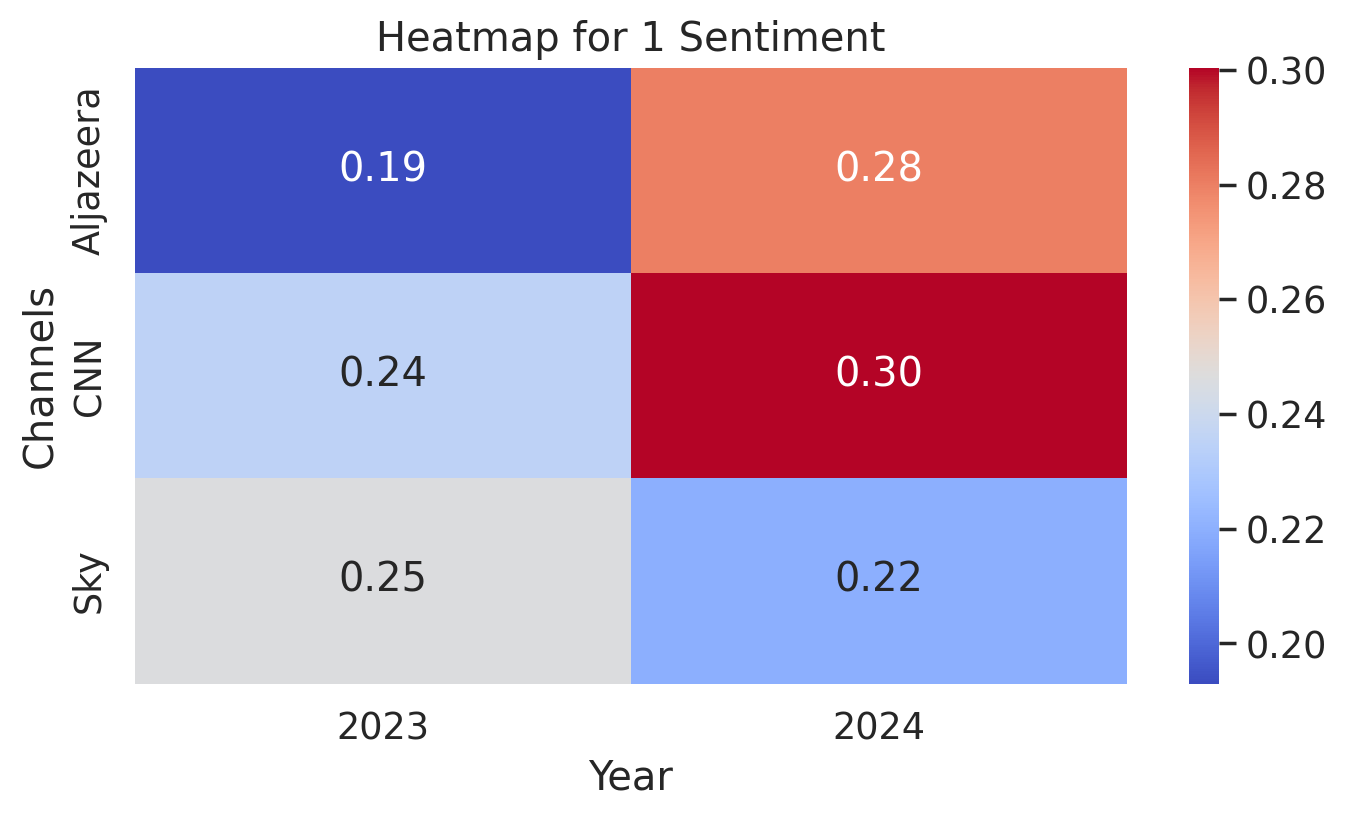

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Assuming you have already loaded your datasets as previously defined
datasets = {
    'Aljazeera 2023': aljazera_2023,
    'Aljazeera 2024': aljazera_2024,
    'CNN 2023': cnn_2023,
    'CNN 2024': cnn_2024,
    'Sky 2023': sky_2023,
    'Sky 2024': sky_2024
}

# Organize data by sentiment
sentiment_data = {}
channels = ['Aljazeera', 'CNN', 'Sky']
years = ['2023', '2024']

for channel in channels:
    sentiment_data[channel] = {}
    for year in years:
        key = f'{channel} {year}'
        sentiment_counts = datasets[key]['sentiment'].value_counts(normalize=True)
        for sentiment in sentiment_counts.keys():
            if sentiment not in sentiment_data[channel]:
                sentiment_data[channel][sentiment] = {}
            sentiment_data[channel][sentiment][year] = sentiment_counts[sentiment]

# Prepare data for heatmap
heatmaps_data = {sentiment: pd.DataFrame(columns=years) for sentiment in sentiment_data[next(iter(sentiment_data))]}
for channel in channels:
    for sentiment, data in sentiment_data[channel].items():
        for year, proportion in data.items():
            heatmaps_data[sentiment].at[channel, year] = proportion

# Plotting each sentiment in a separate heatmap
for sentiment, data in heatmaps_data.items():
    plt.figure(figsize=(8, 4))
    sns.heatmap(data.fillna(0), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f'Heatmap for {sentiment} Sentiment')
    plt.ylabel('Channels')
    plt.xlabel('Year')
    plt.show()


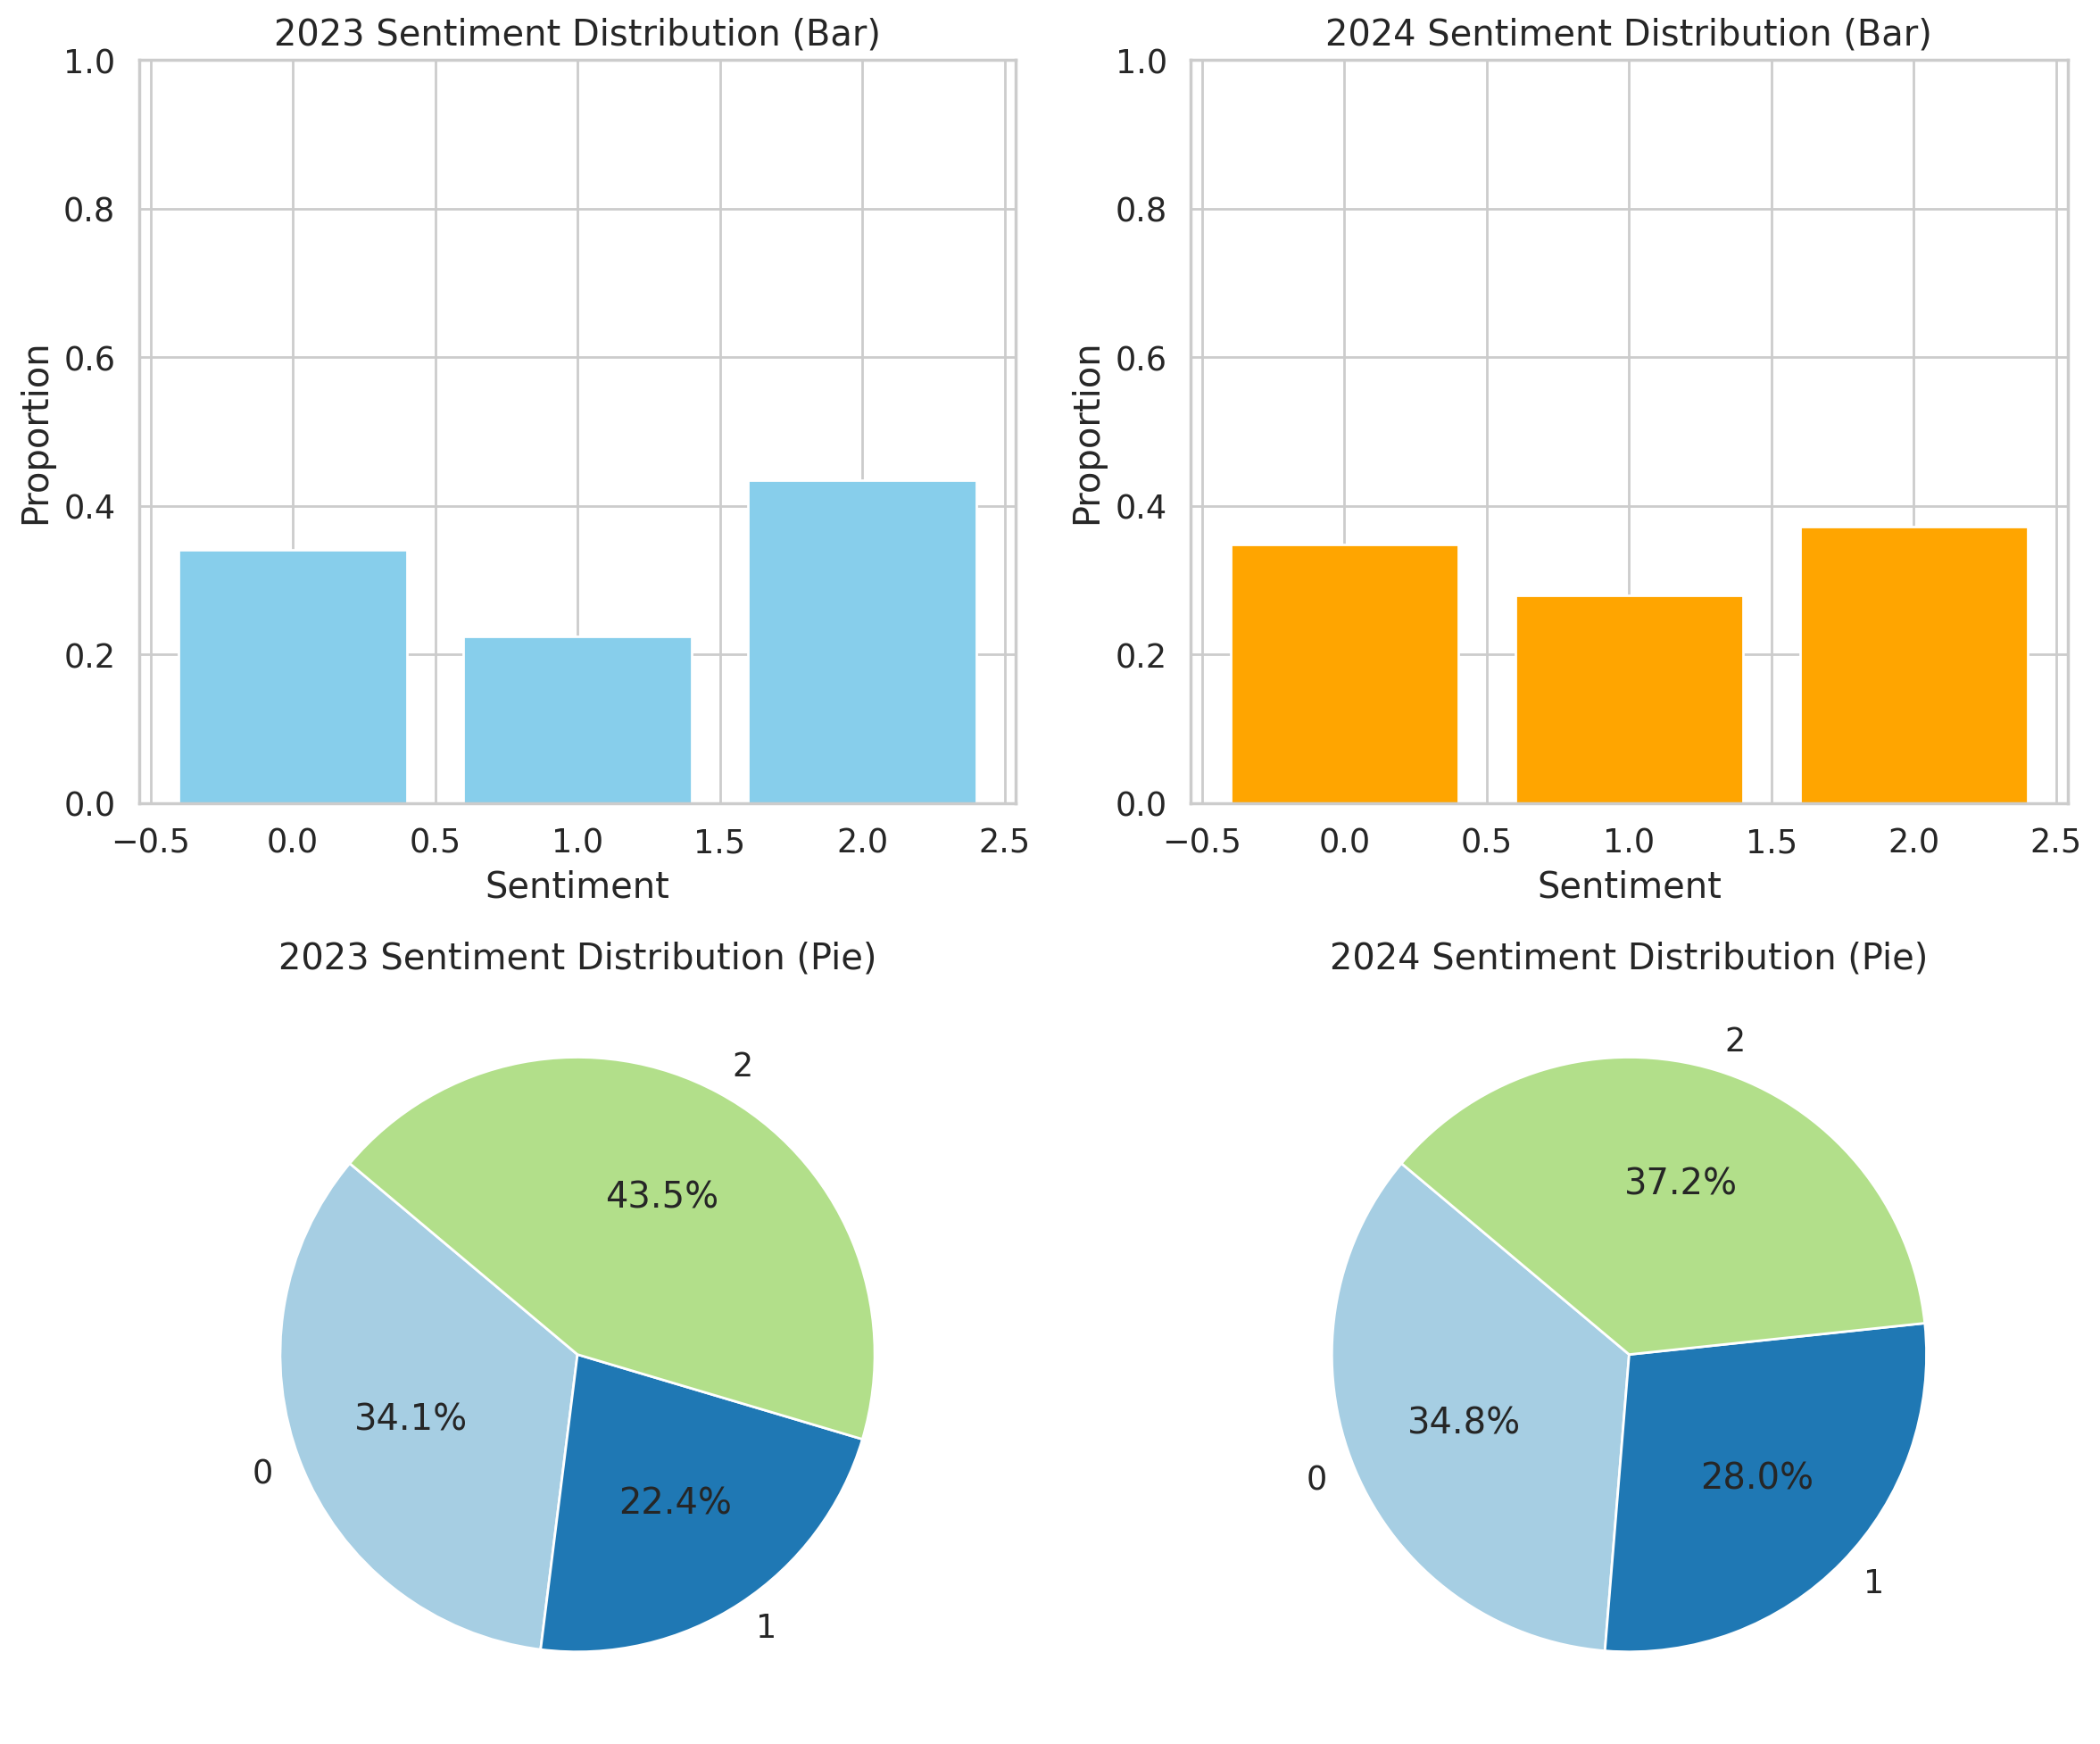

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded your datasets
datasets = {
    'Aljazeera 2023': aljazera_2023,
    'Aljazeera 2024': aljazera_2024,
    'CNN 2023': cnn_2023,
    'CNN 2024': cnn_2024,
    'Sky 2023': sky_2023,
    'Sky 2024': sky_2024
}

# Aggregate 2023 and 2024 data
data_2023 = pd.concat([df for name, df in datasets.items() if '2023' in name])
data_2024 = pd.concat([df for name, df in datasets.items() if '2024' in name])

# Calculate sentiment proportions
sentiment_2023 = data_2023['sentiment'].value_counts(normalize=True).sort_index()
sentiment_2024 = data_2024['sentiment'].value_counts(normalize=True).sort_index()

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Bar charts
axes[0, 0].bar(sentiment_2023.index, sentiment_2023.values, color='skyblue')
axes[0, 0].set_title('2023 Sentiment Distribution (Bar)')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylim(0, 1)

axes[0, 1].bar(sentiment_2024.index, sentiment_2024.values, color='orange')
axes[0, 1].set_title('2024 Sentiment Distribution (Bar)')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylim(0, 1)

# Pie charts
axes[1, 0].pie(sentiment_2023, labels=sentiment_2023.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_2023))))
axes[1, 0].set_title('2023 Sentiment Distribution (Pie)')

axes[1, 1].pie(sentiment_2024, labels=sentiment_2024.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_2024))))
axes[1, 1].set_title('2024 Sentiment Distribution (Pie)')

plt.tight_layout()
plt.show()


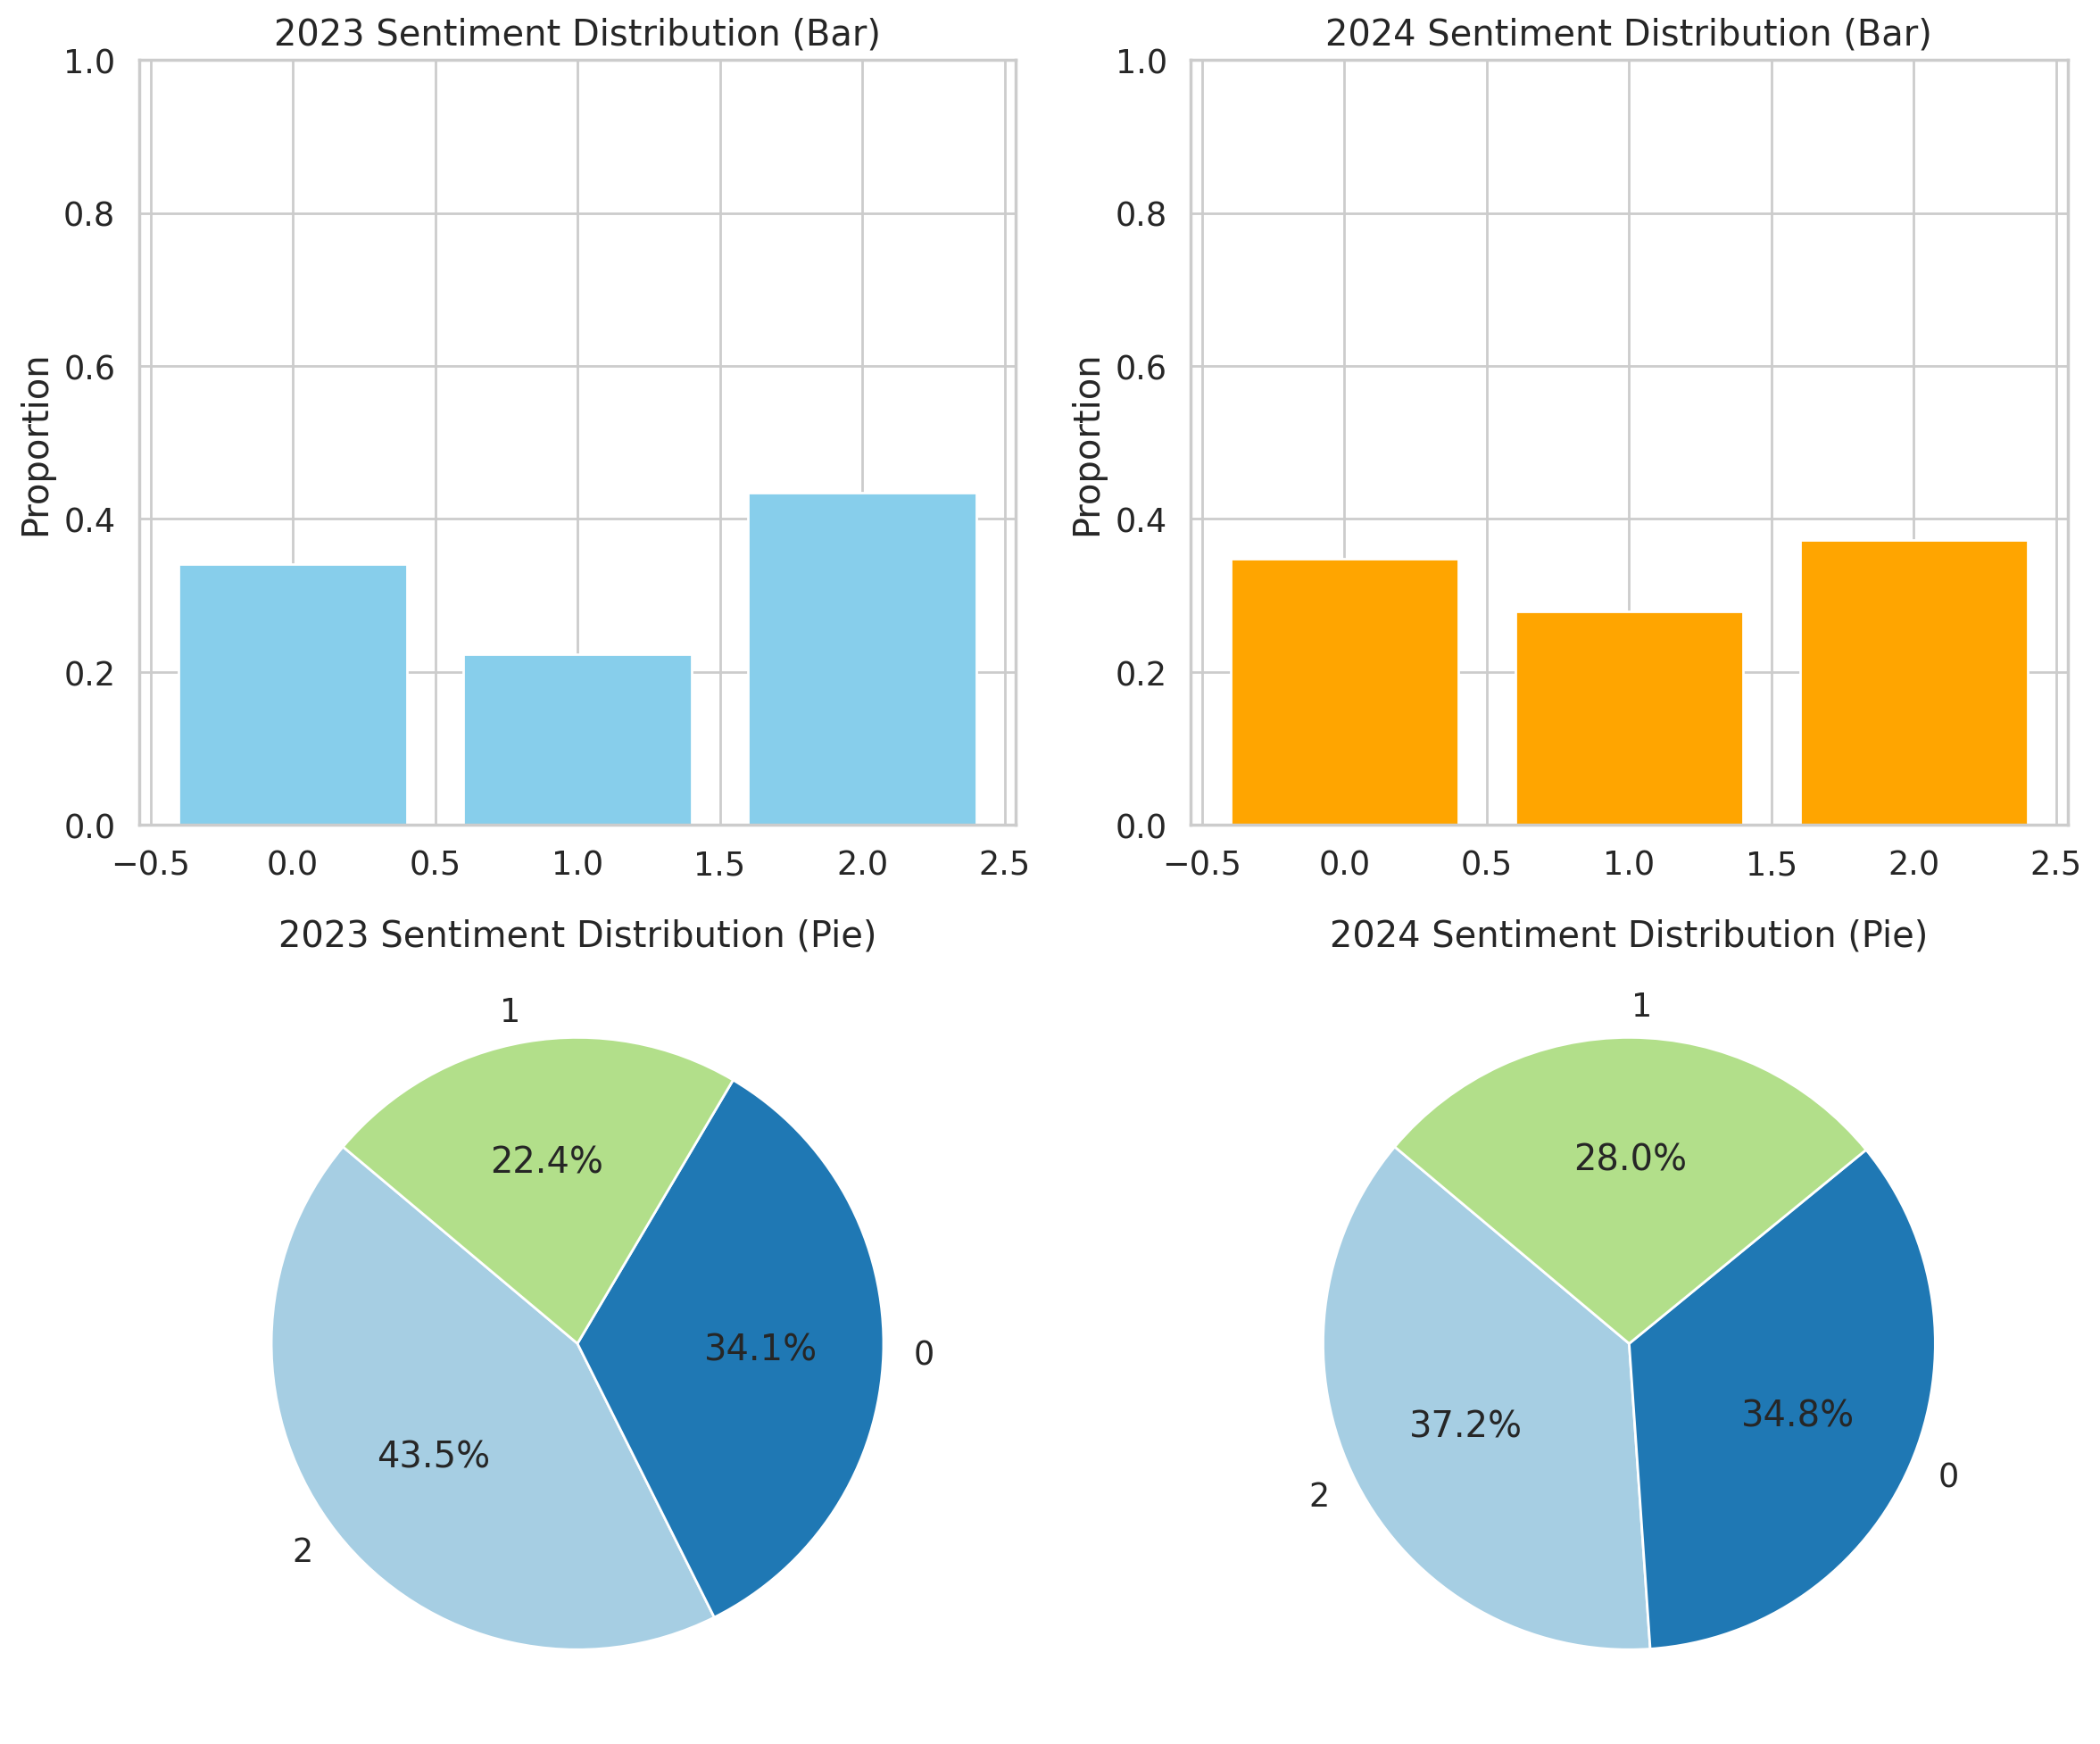

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded your datasets
datasets = {
    'Aljazeera 2023': aljazera_2023,
    'Aljazeera 2024': aljazera_2024,
    'CNN 2023': cnn_2023,
    'CNN 2024': cnn_2024,
    'Sky 2023': sky_2023,
    'Sky 2024': sky_2024
}

# Aggregate 2023 and 2024 data
data_2023 = pd.concat([df for name, df in datasets.items() if '2023' in name])
data_2024 = pd.concat([df for name, df in datasets.items() if '2024' in name])

# Calculate sentiment proportions
sentiment_2023 = data_2023['sentiment'].value_counts(normalize=True)
sentiment_2024 = data_2024['sentiment'].value_counts(normalize=True)

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Bar charts
axes[0, 0].bar(sentiment_2023.index, sentiment_2023.values, color='skyblue')
axes[0, 0].set_title('2023 Sentiment Distribution (Bar)')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].set_ylim(0, 1)

axes[0, 1].bar(sentiment_2024.index, sentiment_2024.values, color='orange')
axes[0, 1].set_title('2024 Sentiment Distribution (Bar)')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].set_ylim(0, 1)

# Pie charts
axes[1, 0].pie(sentiment_2023, labels=sentiment_2023.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_2023))))
axes[1, 0].set_title('2023 Sentiment Distribution (Pie)')

axes[1, 1].pie(sentiment_2024, labels=sentiment_2024.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_2024))))
axes[1, 1].set_title('2024 Sentiment Distribution (Pie)')

plt.tight_layout()
plt.show()


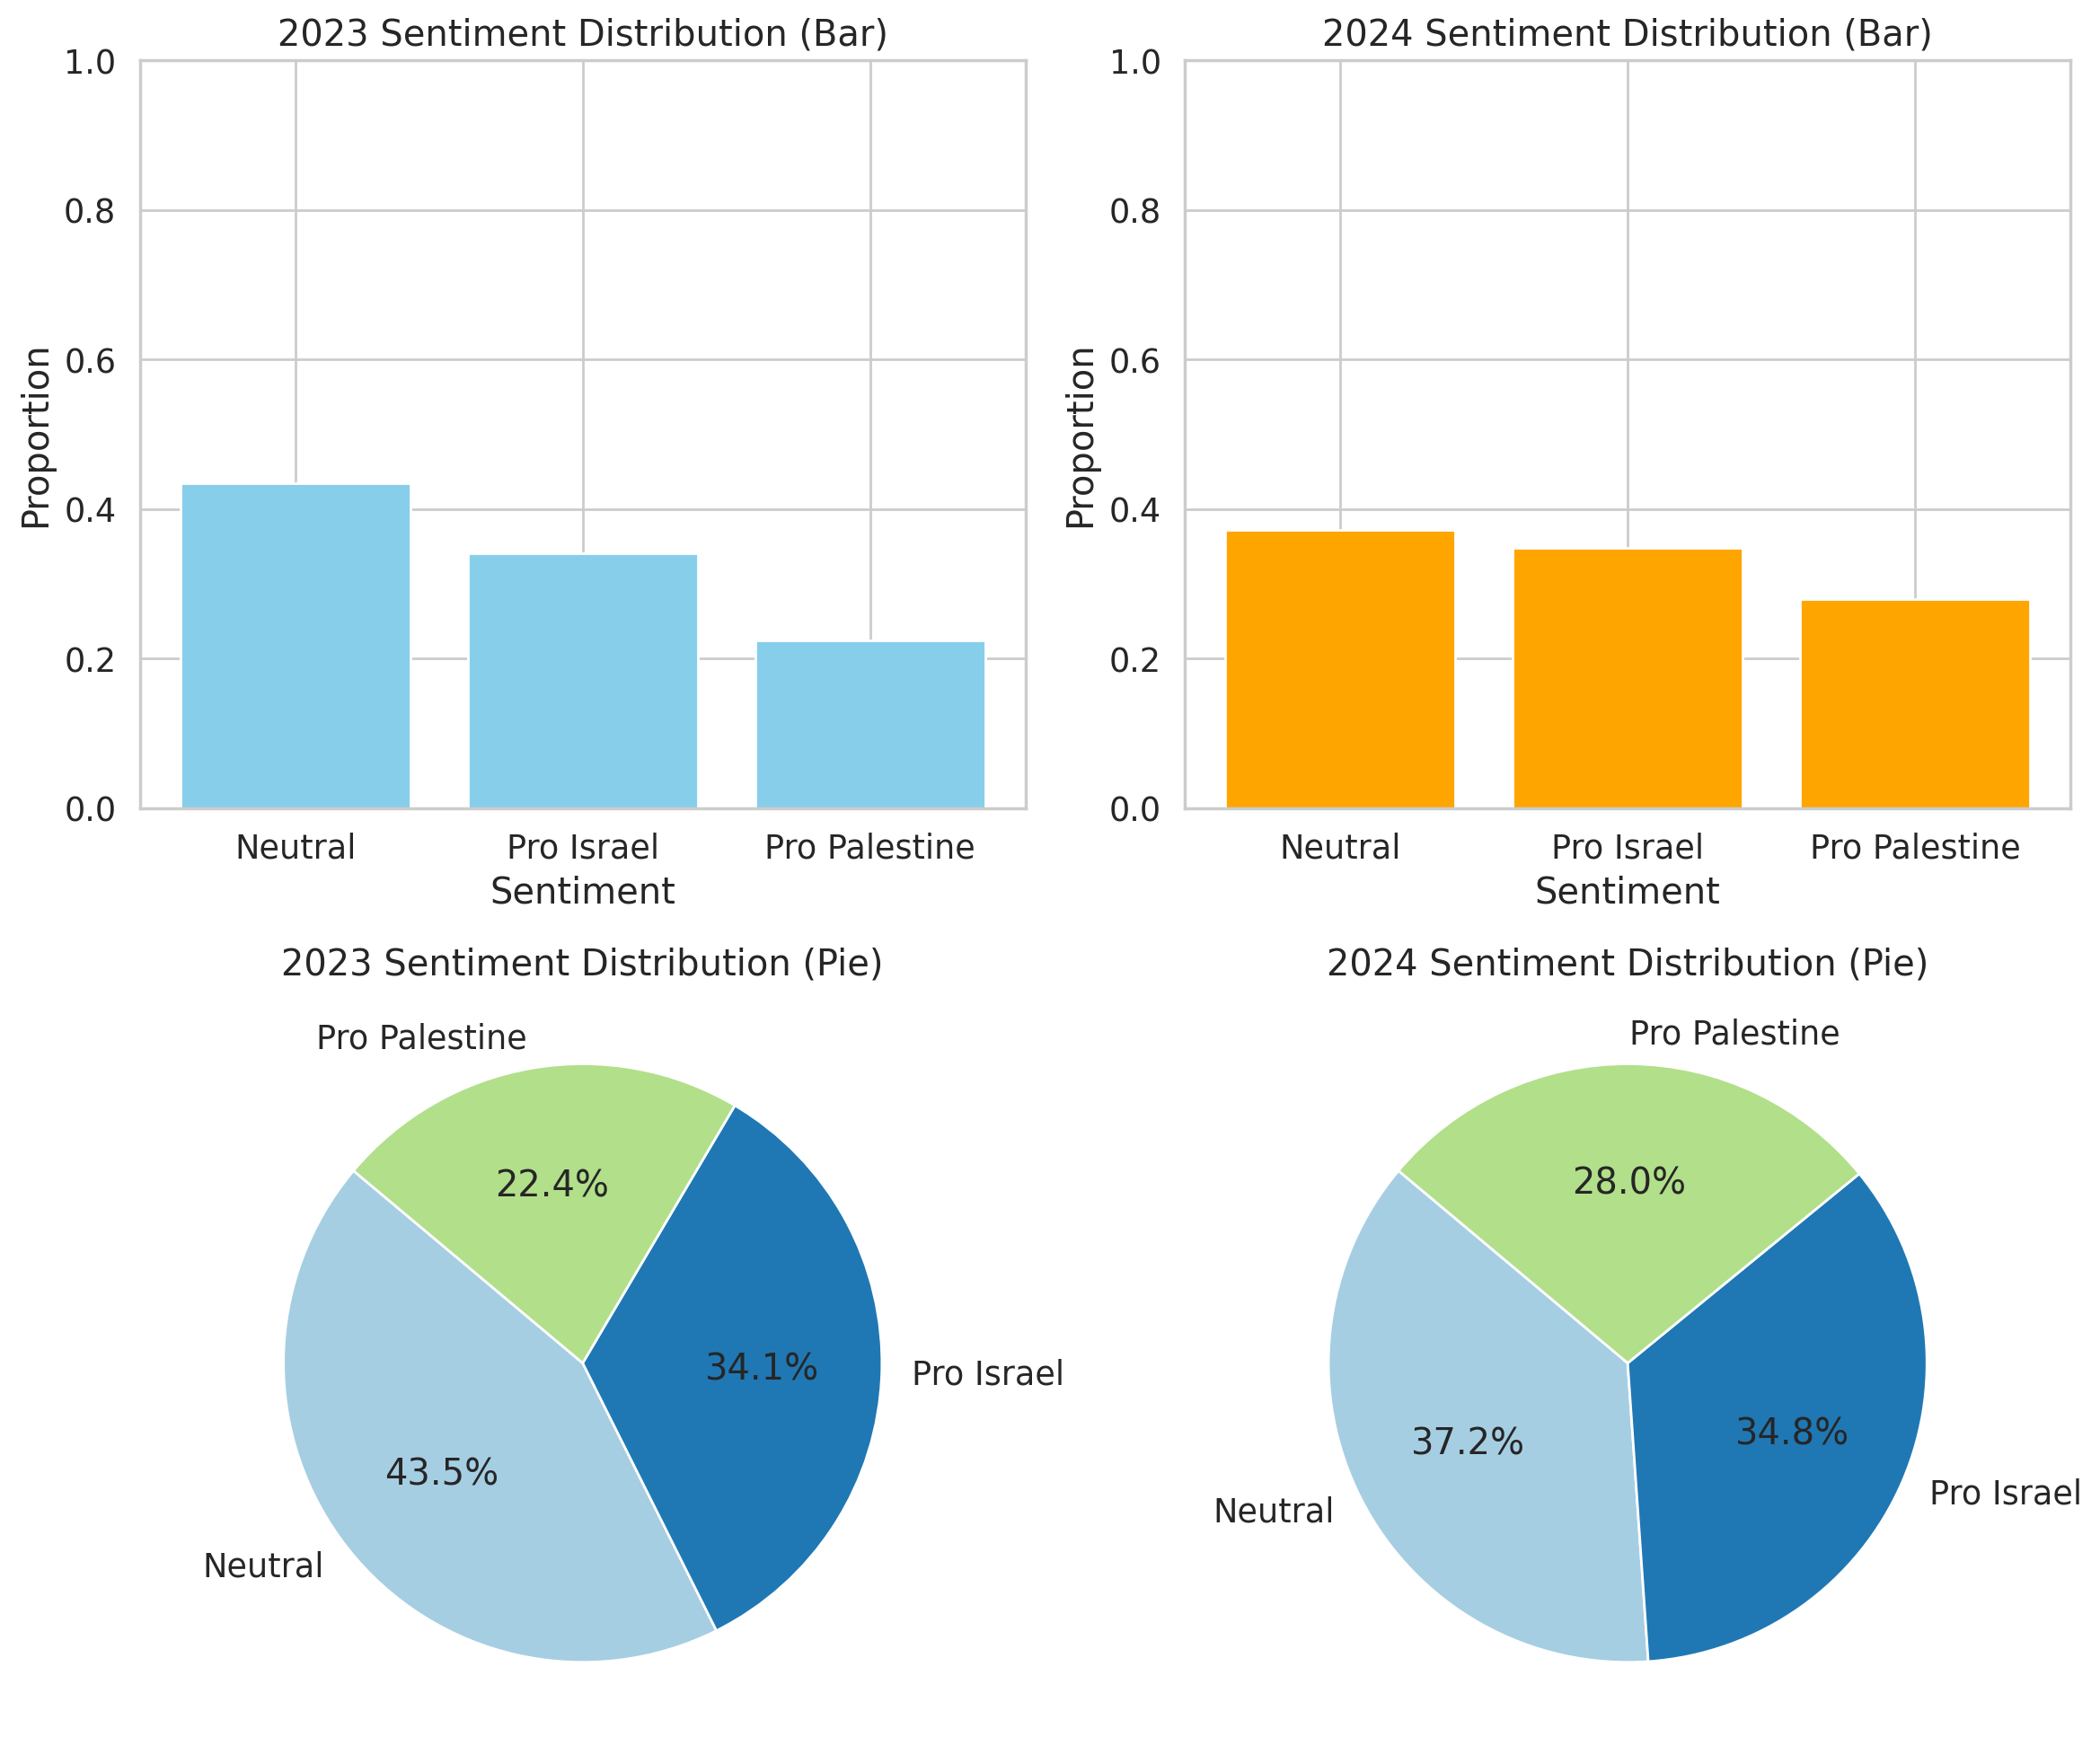

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded your datasets
datasets = {
    'Aljazeera 2023': aljazera_2023,
    'Aljazeera 2024': aljazera_2024,
    'CNN 2023': cnn_2023,
    'CNN 2024': cnn_2024,
    'Sky 2023': sky_2023,
    'Sky 2024': sky_2024
}

# Aggregate 2023 and 2024 data
data_2023 = pd.concat([df for name, df in datasets.items() if '2023' in name])
data_2024 = pd.concat([df for name, df in datasets.items() if '2024' in name])

# Map numeric sentiment values to descriptive labels
sentiment_mapping = {0: 'Pro Israel', 1: 'Pro Palestine', 2: 'Neutral'}

# Calculate sentiment proportions and map labels
sentiment_2023 = data_2023['sentiment'].value_counts(normalize=True).rename(index=sentiment_mapping)
sentiment_2024 = data_2024['sentiment'].value_counts(normalize=True).rename(index=sentiment_mapping)

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Bar charts
axes[0, 0].bar(sentiment_2023.index, sentiment_2023.values, color='skyblue')
axes[0, 0].set_title('2023 Sentiment Distribution (Bar)')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylim(0, 1)

axes[0, 1].bar(sentiment_2024.index, sentiment_2024.values, color='orange')
axes[0, 1].set_title('2024 Sentiment Distribution (Bar)')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylim(0, 1)

# Pie charts
axes[1, 0].pie(sentiment_2023, labels=sentiment_2023.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_2023))))
axes[1, 0].set_title('2023 Sentiment Distribution (Pie)')

axes[1, 1].pie(sentiment_2024, labels=sentiment_2024.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_2024))))
axes[1, 1].set_title('2024 Sentiment Distribution (Pie)')

plt.tight_layout()
plt.show()


Analyzing the "text" column in your dataset alongside the "sentiment" column can provide deeper insights into the nature of the sentiments expressed in comments regarding the conflict. Here are several meaningful visualizations and analyses you can perform to explore the relationship between the text content and its associated sentiments:

Word Clouds for Each Sentiment Category:

Purpose: To visualize the most frequent words used in each sentiment category (Positive, Neutral, Negative).
How to Implement: Generate separate word clouds for each sentiment category. Words that appear more frequently in the comments will appear larger in the word cloud.
Text Length Distribution by Sentiment:

Purpose: To analyze if the length of comments correlates with sentiment.
How to Implement: Create a histogram or box plot to show the distribution of text lengths within each sentiment category.
Term Frequency Analysis:

Purpose: To identify the most common terms or phrases within each sentiment category.
How to Implement: Calculate the term frequency for each sentiment category and display the top terms in a bar chart.
TF-IDF (Term Frequency-Inverse Document Frequency) Analysis:

Purpose: To find out which words are most distinguishing for each sentiment category.
How to Implement: Calculate TF-IDF scores for terms in the dataset and plot the terms with the highest scores for each sentiment category.
Bigram or Trigram Frequency Plots:

Purpose: To identify common phrases or word pairs/triples in the comments that might be indicative of specific sentiments.
How to Implement: Use bigram/trigram analysis to find and plot the most common contiguous sequences of words for each sentiment.
Sentiment Over Time (if timestamp data is available):

Purpose: To examine how sentiments in comments change over time.
How to Implement: Plot a time series graph of sentiment proportions if your dataset includes timestamps.